#Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error, mean_absolute_error, r2_score
warnings.filterwarnings('ignore')
# Load the dataset
data = pd.read_csv('dataset.csv')
data.fillna(data.mean(numeric_only=True), inplace=True)

#AWS Cloudwatch(Anomaly Detection)

##CPU Utilization

In [ ]:
# Load the dataset
data = pd.read_csv('dataset.csv')

# Fill missing values with column mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# Set the 'label' column as index
data.set_index('Label', inplace=True)

# Convert index to datetime if it's a time series
data.index = pd.to_datetime(data.index)

In [ ]:
# Calculate the expected range
data['expected_range'] = data['CPUUtilization (expected) High'] - data['CPUUtilization (expected) Low']

# Calculate the utilization difference
data['utilization_difference'] = data['CPUUtilization'] - data['expected_range']

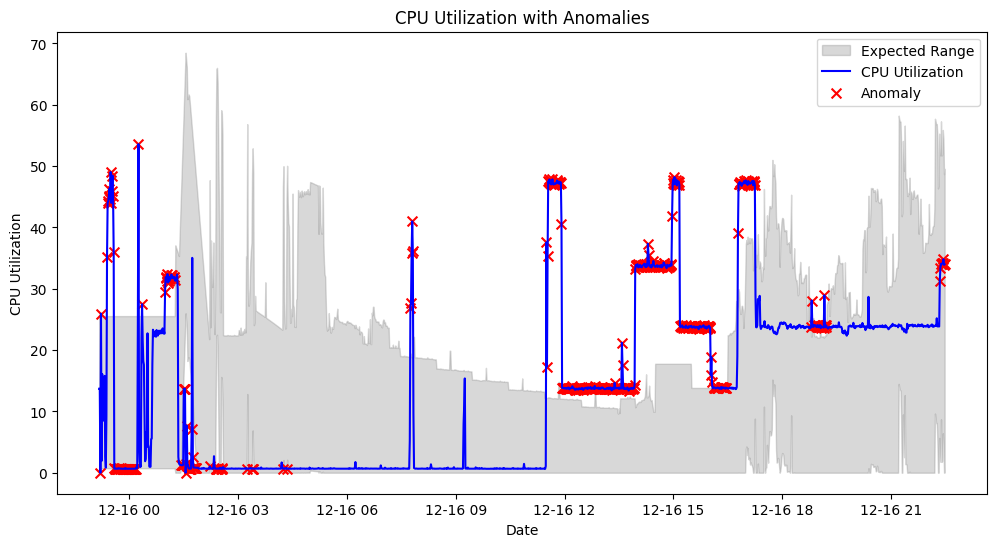

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load the dataset
data = pd.read_csv('dataset.csv')

# Fill missing values with column mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# Set the 'Label' column as index
data.set_index('Label', inplace=True)

# Convert index to datetime if it's a time series
data.index = pd.to_datetime(data.index)

# Calculate the expected range
data['expected_range'] = data['CPUUtilization (expected) High'] - data['CPUUtilization (expected) Low']

# Calculate the utilization difference
data['utilization_difference'] = data['CPUUtilization'] - data['expected_range']

# Select features for anomaly detection
features = data[['CPUUtilization', 'expected_range', 'utilization_difference']]

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit the model
data['anomaly_score'] = iso_forest.fit_predict(features)

# Define anomalies based on expected range
data['is_anomaly'] = np.where(
    (data['CPUUtilization'] < data['CPUUtilization (expected) Low']) |
    (data['CPUUtilization'] > data['CPUUtilization (expected) High']),
    1, 0
)

# Combine the Isolation Forest results with the expected range anomalies
data['final_anomaly'] = np.where(
    (data['is_anomaly'] == 1) | (data['anomaly_score'] == -1),
    1, 0
)

# Visualize the Anomalies
plt.figure(figsize=(12, 6))

# Plot the expected range as a shaded area
plt.fill_between(data.index, data['CPUUtilization (expected) Low'], data['CPUUtilization (expected) High'],
                 color='gray', alpha=0.3, label='Expected Range')

# Plot the CPU utilization
plt.plot(data.index, data['CPUUtilization'], label='CPU Utilization', color='blue')

# Highlight the anomalies
anomalies = data[data['final_anomaly'] == 1]
plt.scatter(anomalies.index, anomalies['CPUUtilization'], color='red', label='Anomaly',
            marker='x', s=50)

plt.xlabel('Date')
plt.ylabel('CPU Utilization')
plt.title('CPU Utilization with Anomalies')
plt.legend()
plt.show()


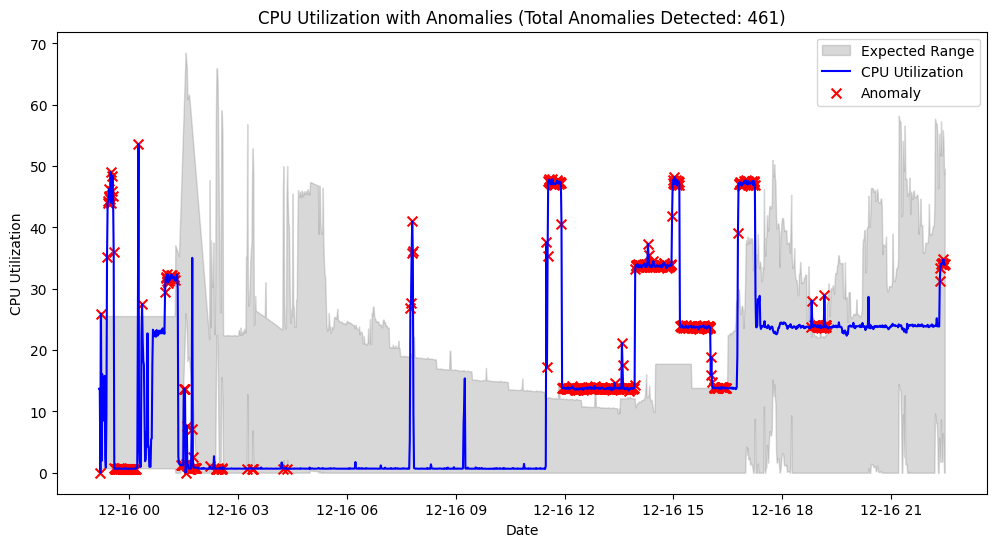

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load the dataset
data = pd.read_csv('dataset.csv')

# Fill missing values with column mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# Set the 'Label' column as index
data.set_index('Label', inplace=True)

# Convert index to datetime if it's a time series
data.index = pd.to_datetime(data.index)

# Calculate the expected range
data['expected_range'] = data['CPUUtilization (expected) High'] - data['CPUUtilization (expected) Low']

# Calculate the utilization difference
data['utilization_difference'] = data['CPUUtilization'] - data['expected_range']

# Select features for anomaly detection
features = data[['CPUUtilization', 'expected_range', 'utilization_difference']]

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit the model
data['anomaly_score'] = iso_forest.fit_predict(features)

# Define anomalies based on expected range
data['is_anomaly'] = np.where(
    (data['CPUUtilization'] < data['CPUUtilization (expected) Low']) |
    (data['CPUUtilization'] > data['CPUUtilization (expected) High']),
    1, 0
)

# Combine the Isolation Forest results with the expected range anomalies
data['final_anomaly'] = np.where(
    (data['is_anomaly'] == 1) | (data['anomaly_score'] == -1),
    1, 0
)

# Count the number of anomalies detected
anomaly_count = data['final_anomaly'].sum()

# Visualize the Anomalies
plt.figure(figsize=(12, 6))

# Plot the expected range as a shaded area
plt.fill_between(data.index, data['CPUUtilization (expected) Low'], data['CPUUtilization (expected) High'],
                 color='gray', alpha=0.3, label='Expected Range')

# Plot the CPU utilization
plt.plot(data.index, data['CPUUtilization'], label='CPU Utilization', color='blue')

# Highlight the anomalies
anomalies = data[data['final_anomaly'] == 1]
plt.scatter(anomalies.index, anomalies['CPUUtilization'], color='red', label='Anomaly',
            marker='x', s=50)

# Update the plot title to include the number of anomalies detected
plt.xlabel('Date')
plt.ylabel('CPU Utilization')
plt.title(f'CPU Utilization with Anomalies (Total Anomalies Detected: {anomaly_count})')
plt.legend()
plt.show()


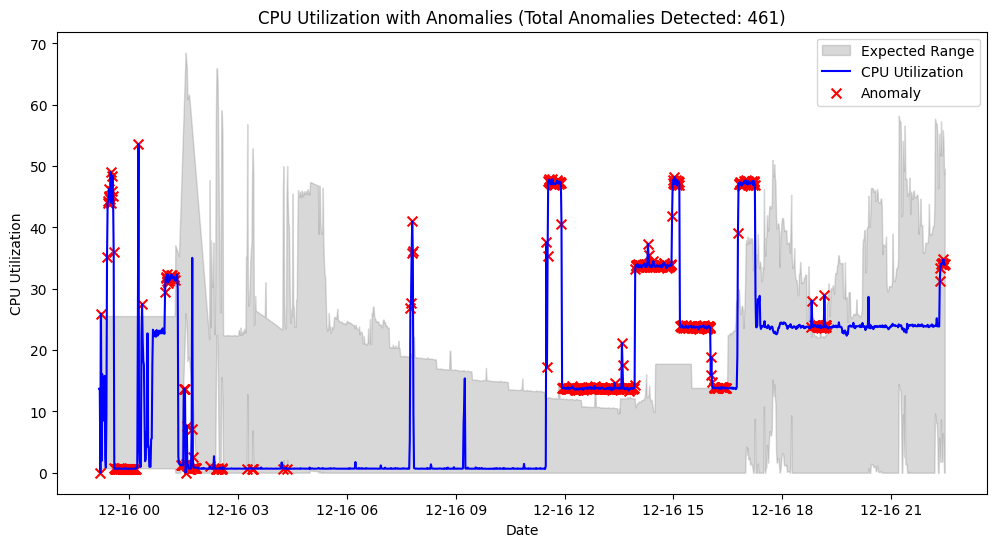

Confusion Matrix:
[[939   9]
 [  0 452]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       948
           1       0.98      1.00      0.99       452

    accuracy                           0.99      1400
   macro avg       0.99      1.00      0.99      1400
weighted avg       0.99      0.99      0.99      1400


Accuracy: 0.99


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('dataset.csv')

# Fill missing values with column mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# Set the 'Label' column as index
data.set_index('Label', inplace=True)

# Convert index to datetime if it's a time series
data.index = pd.to_datetime(data.index)

# Calculate the expected range
data['expected_range'] = data['CPUUtilization (expected) High'] - data['CPUUtilization (expected) Low']

# Calculate the utilization difference
data['utilization_difference'] = data['CPUUtilization'] - data['expected_range']

# Select features for anomaly detection
features = data[['CPUUtilization', 'expected_range', 'utilization_difference']]

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit the model
data['anomaly_score'] = iso_forest.fit_predict(features)

# Define anomalies based on expected range
data['is_anomaly'] = np.where(
    (data['CPUUtilization'] < data['CPUUtilization (expected) Low']) |
    (data['CPUUtilization'] > data['CPUUtilization (expected) High']),
    1, 0
)

# Combine the Isolation Forest results with the expected range anomalies
data['final_anomaly'] = np.where(
    (data['is_anomaly'] == 1) | (data['anomaly_score'] == -1),
    1, 0
)

data['true_label'] = np.where(
    (data['CPUUtilization'] < data['CPUUtilization (expected) Low']) |
    (data['CPUUtilization'] > data['CPUUtilization (expected) High']),
    1, 0
)

# Count the number of anomalies detected
anomaly_count = data['final_anomaly'].sum()

# Calculate confusion matrix and evaluation metrics
conf_matrix = confusion_matrix(data['true_label'], data['final_anomaly'])
class_report = classification_report(data['true_label'], data['final_anomaly'])
accuracy = accuracy_score(data['true_label'], data['final_anomaly'])

# Visualize the Anomalies
plt.figure(figsize=(12, 6))

# Plot the expected range as a shaded area
plt.fill_between(data.index, data['CPUUtilization (expected) Low'], data['CPUUtilization (expected) High'],
                 color='gray', alpha=0.3, label='Expected Range')

# Plot the CPU utilization
plt.plot(data.index, data['CPUUtilization'], label='CPU Utilization', color='blue')

# Highlight the anomalies
anomalies = data[data['final_anomaly'] == 1]
plt.scatter(anomalies.index, anomalies['CPUUtilization'], color='red', label='Anomaly',
            marker='x', s=50)

# Update the plot title to include the number of anomalies detected
plt.xlabel('Date')
plt.ylabel('CPU Utilization')
plt.title(f'CPU Utilization with Anomalies (Total Anomalies Detected: {anomaly_count})')
plt.legend()
plt.show()

# Print the confusion matrix and evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"\nAccuracy: {accuracy:.2f}")


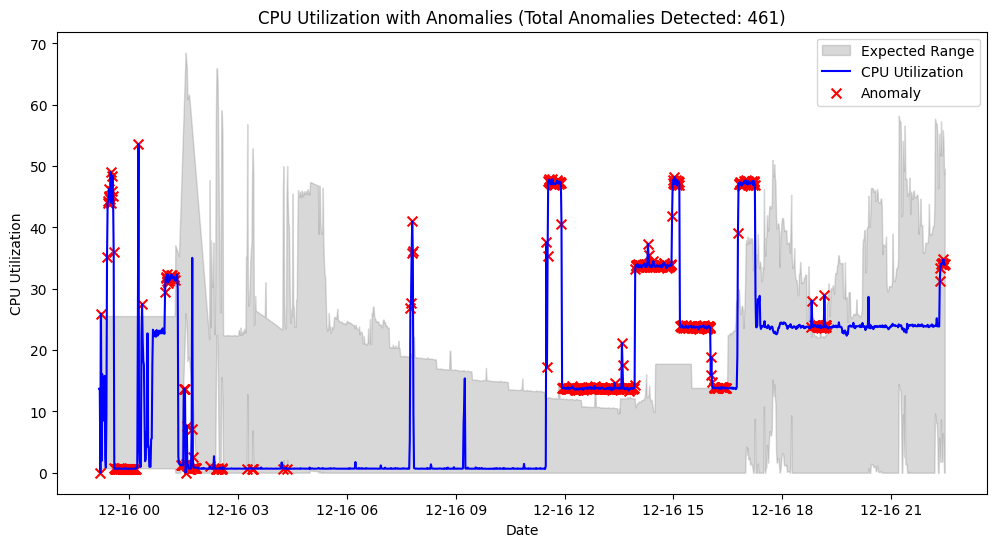

Confusion Matrix:
[[939   9]
 [  0 452]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       948
           1       0.98      1.00      0.99       452

    accuracy                           0.99      1400
   macro avg       0.99      1.00      0.99      1400
weighted avg       0.99      0.99      0.99      1400


Accuracy: 0.99


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('dataset.csv')

# Fill missing values with column mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# Set the 'Label' column as index
data.set_index('Label', inplace=True)

# Convert index to datetime if it's a time series
data.index = pd.to_datetime(data.index)

# Calculate the expected range
data['expected_range'] = data['CPUUtilization (expected) High'] - data['CPUUtilization (expected) Low']

# Calculate the utilization difference
data['utilization_difference'] = data['CPUUtilization'] - data['expected_range']

# Select features for anomaly detection
features = data[['CPUUtilization', 'expected_range', 'utilization_difference']]

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit the model
data['anomaly_score'] = iso_forest.fit_predict(features)

# Define anomalies based on expected range
data['is_anomaly'] = np.where(
    (data['CPUUtilization'] < data['CPUUtilization (expected) Low']) |
    (data['CPUUtilization'] > data['CPUUtilization (expected) High']),
    1, 0
)

# Combine the Isolation Forest results with the expected range anomalies
data['final_anomaly'] = np.where(
    (data['is_anomaly'] == 1) | (data['anomaly_score'] == -1),
    1, 0
)

# True label is defined based on expected range anomalies
# This will be used as the ground truth for evaluation
data['true_label'] = np.where(
    (data['CPUUtilization'] < data['CPUUtilization (expected) Low']) |
    (data['CPUUtilization'] > data['CPUUtilization (expected) High']),
    1, 0
)

# Count the number of anomalies detected
anomaly_count = data['final_anomaly'].sum()

# Calculate confusion matrix and evaluation metrics
conf_matrix = confusion_matrix(data['true_label'], data['final_anomaly'])
class_report = classification_report(data['true_label'], data['final_anomaly'])
accuracy = accuracy_score(data['true_label'], data['final_anomaly'])

# Visualize the Anomalies
plt.figure(figsize=(12, 6))

# Plot the expected range as a shaded area
plt.fill_between(data.index, data['CPUUtilization (expected) Low'], data['CPUUtilization (expected) High'],
                 color='gray', alpha=0.3, label='Expected Range')

# Plot the CPU utilization
plt.plot(data.index, data['CPUUtilization'], label='CPU Utilization', color='blue')

# Highlight the anomalies
anomalies = data[data['final_anomaly'] == 1]
plt.scatter(anomalies.index, anomalies['CPUUtilization'], color='red', label='Anomaly',
            marker='x', s=50)

# Update the plot title to include the number of anomalies detected
plt.xlabel('Date')
plt.ylabel('CPU Utilization')
plt.title(f'CPU Utilization with Anomalies (Total Anomalies Detected: {anomaly_count})')
plt.legend()
plt.show()

# Print the confusion matrix and evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"\nAccuracy: {accuracy:.2f}")


##NetworkIn

In [ ]:
# Load the dataset
data = pd.read_csv('dataset.csv')

# Fill missing values with column mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# Set the 'label' column as index
data.set_index('Label', inplace=True)

# Convert index to datetime if it's a time series
data.index = pd.to_datetime(data.index)

In [ ]:
# Calculate the expected range
data['expected_range'] = data['NetworkIn (expected) High'] - data['NetworkIn (expected) Low']

# Calculate the utilization difference
data['utilization_difference'] = data['NetworkIn'] - data['expected_range']

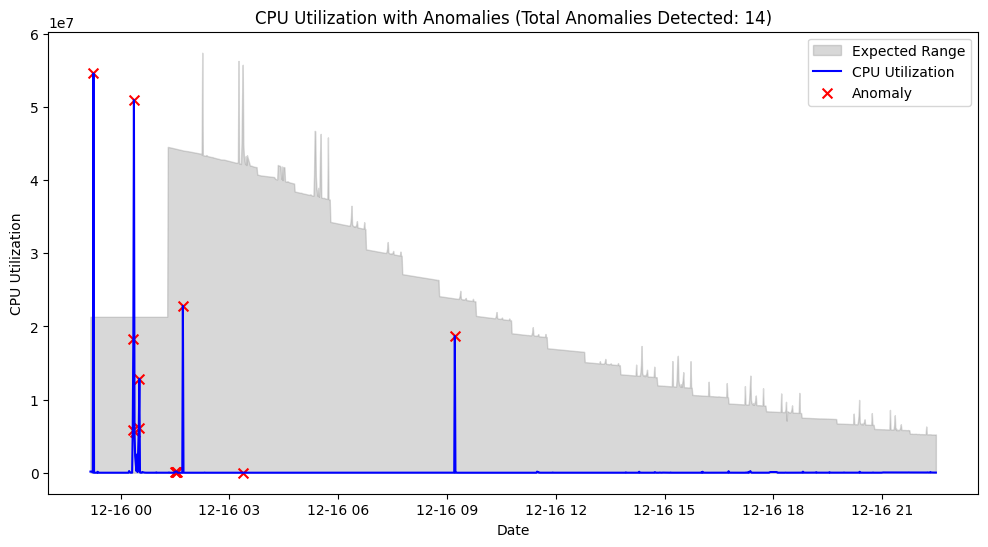

Confusion Matrix:
[[1386   12]
 [   0    2]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1398
           1       0.14      1.00      0.25         2

    accuracy                           0.99      1400
   macro avg       0.57      1.00      0.62      1400
weighted avg       1.00      0.99      0.99      1400


Accuracy: 0.99


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('dataset.csv')

# Fill missing values with column mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# Set the 'Label' column as index
data.set_index('Label', inplace=True)

# Convert index to datetime if it's a time series
data.index = pd.to_datetime(data.index)

# Calculate the expected range
data['expected_range'] = data['NetworkIn (expected) High'] - data['NetworkIn (expected) Low']

# Calculate the utilization difference
data['utilization_difference'] = data['NetworkIn'] - data['expected_range']

# Select features for anomaly detection
features = data[['NetworkIn', 'expected_range', 'utilization_difference']]

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit the model
data['anomaly_score'] = iso_forest.fit_predict(features)

# Define anomalies based on expected range
data['is_anomaly'] = np.where(
    (data['NetworkIn'] < data['NetworkIn (expected) Low']) |
    (data['NetworkIn'] > data['NetworkIn (expected) High']),
    1, 0
)

# Combine the Isolation Forest results with the expected range anomalies
data['final_anomaly'] = np.where(
    (data['is_anomaly'] == 1) | (data['anomaly_score'] == -1),
    1, 0
)

data['true_label'] = np.where(
    (data['NetworkIn'] < data['NetworkIn (expected) Low']) |
    (data['NetworkIn'] > data['NetworkIn (expected) High']),
    1, 0
)

# Count the number of anomalies detected
anomaly_count = data['final_anomaly'].sum()

# Calculate confusion matrix and evaluation metrics
conf_matrix = confusion_matrix(data['true_label'], data['final_anomaly'])
class_report = classification_report(data['true_label'], data['final_anomaly'])
accuracy = accuracy_score(data['true_label'], data['final_anomaly'])

# Visualize the Anomalies
plt.figure(figsize=(12, 6))

# Plot the expected range as a shaded area
plt.fill_between(data.index, data['NetworkIn (expected) Low'], data['NetworkIn (expected) High'],
                 color='gray', alpha=0.3, label='Expected Range')

# Plot the CPU utilization
plt.plot(data.index, data['NetworkIn'], label='CPU Utilization', color='blue')

# Highlight the anomalies
anomalies = data[data['final_anomaly'] == 1]
plt.scatter(anomalies.index, anomalies['NetworkIn'], color='red', label='Anomaly',
            marker='x', s=50)

# Update the plot title to include the number of anomalies detected
plt.xlabel('Date')
plt.ylabel('CPU Utilization')
plt.title(f'CPU Utilization with Anomalies (Total Anomalies Detected: {anomaly_count})')
plt.legend()
plt.show()

# Print the confusion matrix and evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"\nAccuracy: {accuracy:.2f}")


##NetworkOut

In [ ]:
# Load the dataset
data = pd.read_csv('dataset.csv')

# Fill missing values with column mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# Set the 'label' column as index
data.set_index('Label', inplace=True)

# Convert index to datetime if it's a time series
data.index = pd.to_datetime(data.index)

In [ ]:
# Calculate the expected range
data['expected_range'] = data['NetworkOut (expected) High'] - data['NetworkOut (expected) Low']

# Calculate the utilization difference
data['utilization_difference'] = data['NetworkOut'] - data['expected_range']

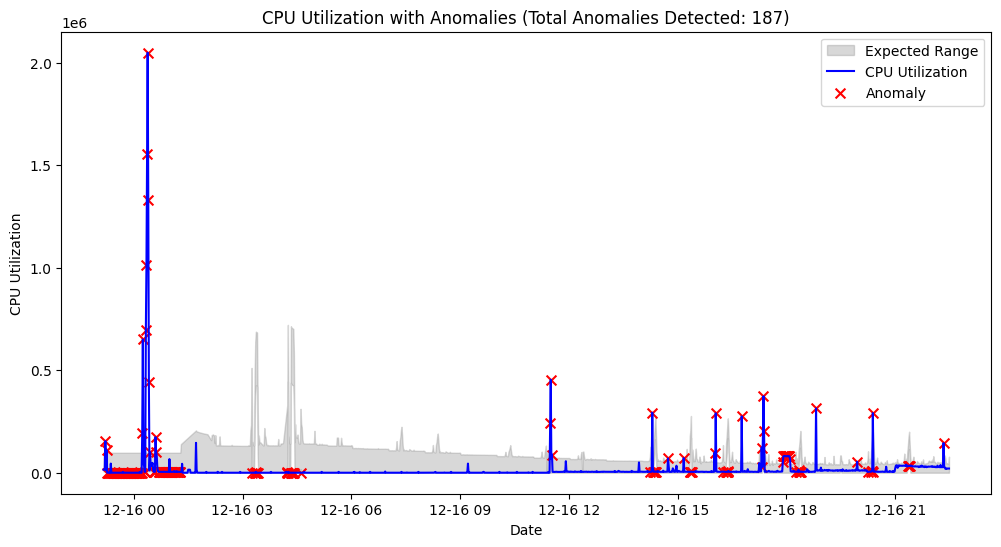

Confusion Matrix:
[[1213    0]
 [   0  187]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1213
           1       1.00      1.00      1.00       187

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400


Accuracy: 1.00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('dataset.csv')

# Fill missing values with column mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# Set the 'Label' column as index
data.set_index('Label', inplace=True)

# Convert index to datetime if it's a time series
data.index = pd.to_datetime(data.index)

# Calculate the expected range
data['expected_range'] = data['NetworkOut (expected) High'] - data['NetworkOut (expected) Low']

# Calculate the utilization difference
data['utilization_difference'] = data['NetworkOut'] - data['expected_range']

# Select features for anomaly detection
features = data[['NetworkOut', 'expected_range', 'utilization_difference']]

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit the model
data['anomaly_score'] = iso_forest.fit_predict(features)

# Define anomalies based on expected range
data['is_anomaly'] = np.where(
    (data['NetworkOut'] < data['NetworkOut (expected) Low']) |
    (data['NetworkOut'] > data['NetworkOut (expected) High']),
    1, 0
)

# Combine the Isolation Forest results with the expected range anomalies
data['final_anomaly'] = np.where(
    (data['is_anomaly'] == 1) | (data['anomaly_score'] == -1),
    1, 0
)

data['true_label'] = np.where(
    (data['NetworkOut'] < data['NetworkOut (expected) Low']) |
    (data['NetworkOut'] > data['NetworkOut (expected) High']),
    1, 0
)

# Count the number of anomalies detected
anomaly_count = data['final_anomaly'].sum()

# Calculate confusion matrix and evaluation metrics
conf_matrix = confusion_matrix(data['true_label'], data['final_anomaly'])
class_report = classification_report(data['true_label'], data['final_anomaly'])
accuracy = accuracy_score(data['true_label'], data['final_anomaly'])

# Visualize the Anomalies
plt.figure(figsize=(12, 6))

# Plot the expected range as a shaded area
plt.fill_between(data.index, data['NetworkOut (expected) Low'], data['NetworkOut (expected) High'],
                 color='gray', alpha=0.3, label='Expected Range')

# Plot the CPU utilization
plt.plot(data.index, data['NetworkOut'], label='CPU Utilization', color='blue')

# Highlight the anomalies
anomalies = data[data['final_anomaly'] == 1]
plt.scatter(anomalies.index, anomalies['NetworkOut'], color='red', label='Anomaly',
            marker='x', s=50)

# Update the plot title to include the number of anomalies detected
plt.xlabel('Date')
plt.ylabel('CPU Utilization')
plt.title(f'CPU Utilization with Anomalies (Total Anomalies Detected: {anomaly_count})')
plt.legend()
plt.show()

# Print the confusion matrix and evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"\nAccuracy: {accuracy:.2f}")


##NetworkPacketsin

In [ ]:
# Load the dataset
data = pd.read_csv('dataset.csv')

# Fill missing values with column mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# Set the 'label' column as index
data.set_index('Label', inplace=True)

# Convert index to datetime if it's a time series
data.index = pd.to_datetime(data.index)

In [ ]:
# Calculate the expected range
data['expected_range'] = data['NetworkPacketsIn (expected) High'] - data['NetworkPacketsIn (expected) Low']

# Calculate the utilization difference
data['utilization_difference'] = data['NetworkPacketsIn'] - data['expected_range']

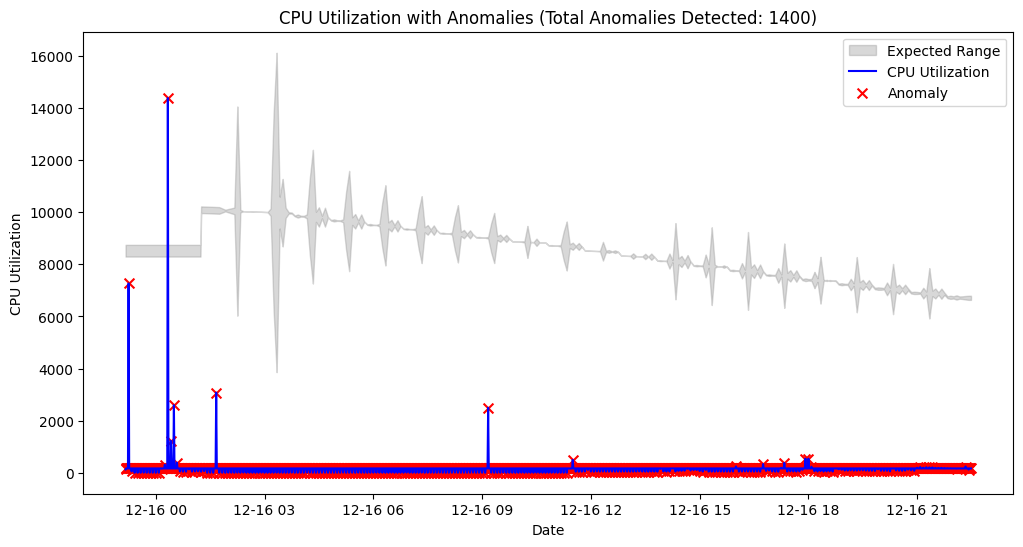

Confusion Matrix:
[[1400]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1400

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400


Accuracy: 1.00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('dataset.csv')

# Fill missing values with column mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# Set the 'Label' column as index
data.set_index('Label', inplace=True)

# Convert index to datetime if it's a time series
data.index = pd.to_datetime(data.index)

# Calculate the expected range
data['expected_range'] = data['NetworkPacketsIn (expected) High'] - data['NetworkPacketsIn (expected) Low']

# Calculate the utilization difference
data['utilization_difference'] = data['NetworkPacketsIn'] - data['expected_range']

# Select features for anomaly detection
features = data[['NetworkPacketsIn', 'expected_range', 'utilization_difference']]

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit the model
data['anomaly_score'] = iso_forest.fit_predict(features)

# Define anomalies based on expected range
data['is_anomaly'] = np.where(
    (data['NetworkPacketsIn'] < data['NetworkPacketsIn (expected) Low']) |
    (data['NetworkPacketsIn'] > data['NetworkPacketsIn (expected) High']),
    1, 0
)

# Combine the Isolation Forest results with the expected range anomalies
data['final_anomaly'] = np.where(
    (data['is_anomaly'] == 1) | (data['anomaly_score'] == -1),
    1, 0
)

data['true_label'] = np.where(
    (data['NetworkPacketsIn'] < data['NetworkPacketsIn (expected) Low']) |
    (data['NetworkPacketsIn'] > data['NetworkPacketsIn (expected) High']),
    1, 0
)

# Count the number of anomalies detected
anomaly_count = data['final_anomaly'].sum()

# Calculate confusion matrix and evaluation metrics
conf_matrix = confusion_matrix(data['true_label'], data['final_anomaly'])
class_report = classification_report(data['true_label'], data['final_anomaly'])
accuracy = accuracy_score(data['true_label'], data['final_anomaly'])

# Visualize the Anomalies
plt.figure(figsize=(12, 6))

# Plot the expected range as a shaded area
plt.fill_between(data.index, data['NetworkPacketsIn (expected) Low'], data['NetworkPacketsIn (expected) High'],
                 color='gray', alpha=0.3, label='Expected Range')

# Plot the CPU utilization
plt.plot(data.index, data['NetworkPacketsIn'], label='CPU Utilization', color='blue')

# Highlight the anomalies
anomalies = data[data['final_anomaly'] == 1]
plt.scatter(anomalies.index, anomalies['NetworkPacketsIn'], color='red', label='Anomaly',
            marker='x', s=50)

# Update the plot title to include the number of anomalies detected
plt.xlabel('Date')
plt.ylabel('CPU Utilization')
plt.title(f'CPU Utilization with Anomalies (Total Anomalies Detected: {anomaly_count})')
plt.legend()
plt.show()

# Print the confusion matrix and evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"\nAccuracy: {accuracy:.2f}")


##NetworkPacketsOut

In [ ]:
# Load the dataset
data = pd.read_csv('dataset.csv')

# Fill missing values with column mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# Set the 'label' column as index
data.set_index('Label', inplace=True)

# Convert index to datetime if it's a time series
data.index = pd.to_datetime(data.index)

In [ ]:
# Calculate the expected range
data['expected_range'] = data['NetworkPacketsOut (expected) High'] - data['NetworkPacketsOut (expected) Low']

# Calculate the utilization difference
data['utilization_difference'] = data['NetworkPacketsOut'] - data['expected_range']

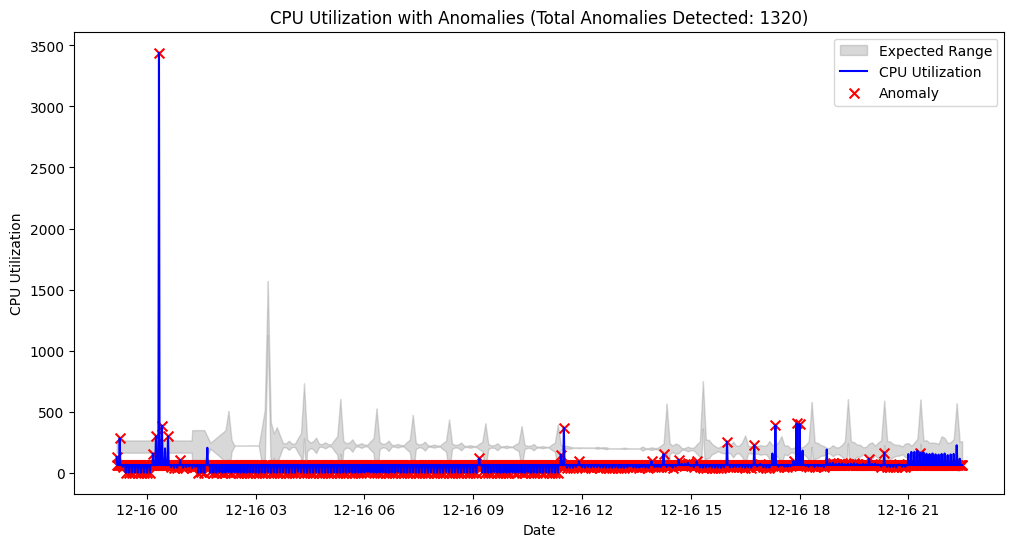

Confusion Matrix:
[[  80    0]
 [   0 1320]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00      1320

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400


Accuracy: 1.00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('dataset.csv')

# Fill missing values with column mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# Set the 'Label' column as index
data.set_index('Label', inplace=True)

# Convert index to datetime if it's a time series
data.index = pd.to_datetime(data.index)

# Calculate the expected range
data['expected_range'] = data['NetworkPacketsOut (expected) High'] - data['NetworkPacketsOut (expected) Low']

# Calculate the utilization difference
data['utilization_difference'] = data['NetworkPacketsOut'] - data['expected_range']

# Select features for anomaly detection
features = data[['NetworkPacketsOut', 'expected_range', 'utilization_difference']]

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit the model
data['anomaly_score'] = iso_forest.fit_predict(features)

# Define anomalies based on expected range
data['is_anomaly'] = np.where(
    (data['NetworkPacketsOut'] < data['NetworkPacketsOut (expected) Low']) |
    (data['NetworkPacketsOut'] > data['NetworkPacketsOut (expected) High']),
    1, 0
)

# Combine the Isolation Forest results with the expected range anomalies
data['final_anomaly'] = np.where(
    (data['is_anomaly'] == 1) | (data['anomaly_score'] == -1),
    1, 0
)

data['true_label'] = np.where(
    (data['NetworkPacketsOut'] < data['NetworkPacketsOut (expected) Low']) |
    (data['NetworkPacketsOut'] > data['NetworkPacketsOut (expected) High']),
    1, 0
)

# Count the number of anomalies detected
anomaly_count = data['final_anomaly'].sum()

# Calculate confusion matrix and evaluation metrics
conf_matrix = confusion_matrix(data['true_label'], data['final_anomaly'])
class_report = classification_report(data['true_label'], data['final_anomaly'])
accuracy = accuracy_score(data['true_label'], data['final_anomaly'])

# Visualize the Anomalies
plt.figure(figsize=(12, 6))

# Plot the expected range as a shaded area
plt.fill_between(data.index, data['NetworkPacketsOut (expected) Low'], data['NetworkPacketsOut (expected) High'],
                 color='gray', alpha=0.3, label='Expected Range')

# Plot the CPU utilization
plt.plot(data.index, data['NetworkPacketsOut'], label='CPU Utilization', color='blue')

# Highlight the anomalies
anomalies = data[data['final_anomaly'] == 1]
plt.scatter(anomalies.index, anomalies['NetworkPacketsOut'], color='red', label='Anomaly',
            marker='x', s=50)

# Update the plot title to include the number of anomalies detected
plt.xlabel('Date')
plt.ylabel('CPU Utilization')
plt.title(f'CPU Utilization with Anomalies (Total Anomalies Detected: {anomaly_count})')
plt.legend()
plt.show()

# Print the confusion matrix and evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"\nAccuracy: {accuracy:.2f}")


##CPU CREDIT USAGE

In [ ]:
# Load the dataset
data = pd.read_csv('dataset.csv')

# Fill missing values with column mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# Set the 'label' column as index
data.set_index('Label', inplace=True)

# Convert index to datetime if it's a time series
data.index = pd.to_datetime(data.index)

In [ ]:
# Calculate the expected range
data['expected_range'] = data['CPUCreditUsage (expected) High'] - data['CPUCreditUsage (expected) Low']

# Calculate the utilization difference
data['utilization_difference'] = data['CPUCreditUsage'] - data['expected_range']

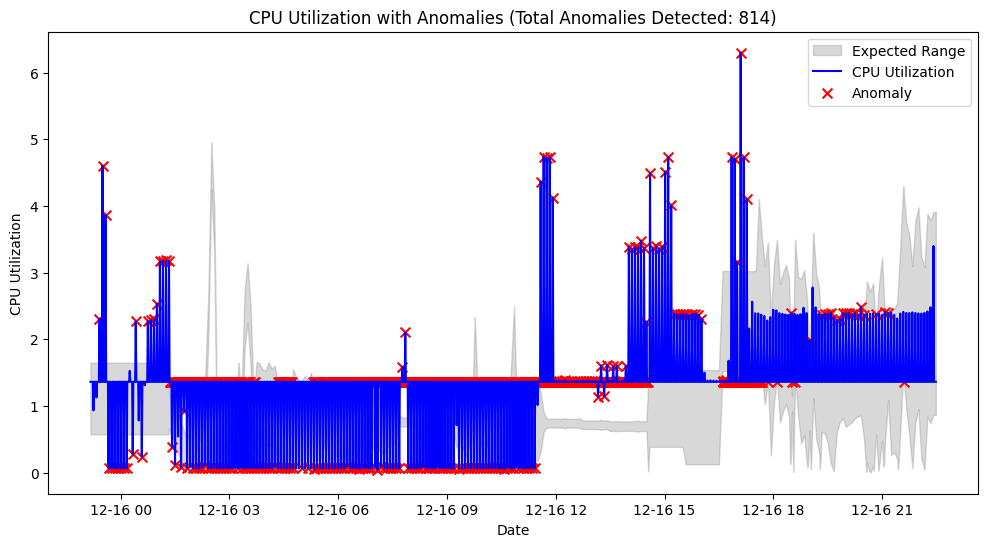

Confusion Matrix:
[[586   0]
 [  0 814]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       586
           1       1.00      1.00      1.00       814

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400


Accuracy: 1.00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('dataset.csv')

# Fill missing values with column mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# Set the 'Label' column as index
data.set_index('Label', inplace=True)

# Convert index to datetime if it's a time series
data.index = pd.to_datetime(data.index)

# Calculate the expected range
data['expected_range'] = data['CPUCreditUsage (expected) High'] - data['CPUCreditUsage (expected) Low']

# Calculate the utilization difference
data['utilization_difference'] = data['CPUCreditUsage'] - data['expected_range']

# Select features for anomaly detection
features = data[['CPUCreditUsage', 'expected_range', 'utilization_difference']]

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit the model
data['anomaly_score'] = iso_forest.fit_predict(features)

# Define anomalies based on expected range
data['is_anomaly'] = np.where(
    (data['CPUCreditUsage'] < data['CPUCreditUsage (expected) Low']) |
    (data['CPUCreditUsage'] > data['CPUCreditUsage (expected) High']),
    1, 0
)

# Combine the Isolation Forest results with the expected range anomalies
data['final_anomaly'] = np.where(
    (data['is_anomaly'] == 1) | (data['anomaly_score'] == -1),
    1, 0
)

data['true_label'] = np.where(
    (data['CPUCreditUsage'] < data['CPUCreditUsage (expected) Low']) |
    (data['CPUCreditUsage'] > data['CPUCreditUsage (expected) High']),
    1, 0
)

# Count the number of anomalies detected
anomaly_count = data['final_anomaly'].sum()

# Calculate confusion matrix and evaluation metrics
conf_matrix = confusion_matrix(data['true_label'], data['final_anomaly'])
class_report = classification_report(data['true_label'], data['final_anomaly'])
accuracy = accuracy_score(data['true_label'], data['final_anomaly'])

# Visualize the Anomalies
plt.figure(figsize=(12, 6))

# Plot the expected range as a shaded area
plt.fill_between(data.index, data['CPUCreditUsage (expected) Low'], data['CPUCreditUsage (expected) High'],
                 color='gray', alpha=0.3, label='Expected Range')

# Plot the CPU utilization
plt.plot(data.index, data['CPUCreditUsage'], label='CPU Utilization', color='blue')

# Highlight the anomalies
anomalies = data[data['final_anomaly'] == 1]
plt.scatter(anomalies.index, anomalies['CPUCreditUsage'], color='red', label='Anomaly',
            marker='x', s=50)

# Update the plot title to include the number of anomalies detected
plt.xlabel('Date')
plt.ylabel('CPU Utilization')
plt.title(f'CPU Utilization with Anomalies (Total Anomalies Detected: {anomaly_count})')
plt.legend()
plt.show()

# Print the confusion matrix and evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"\nAccuracy: {accuracy:.2f}")


##CPU CREDIT BALANCE

In [ ]:
# Load the dataset
data = pd.read_csv('dataset.csv')

# Fill missing values with column mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# Set the 'label' column as index
data.set_index('Label', inplace=True)

# Convert index to datetime if it's a time series
data.index = pd.to_datetime(data.index)

In [ ]:
# Calculate the expected range
data['expected_range'] = data['CPUCreditBalance (expected) High'] - data['CPUCreditBalance (expected) Low']

# Calculate the utilization difference
data['utilization_difference'] = data['CPUCreditBalance'] - data['expected_range']

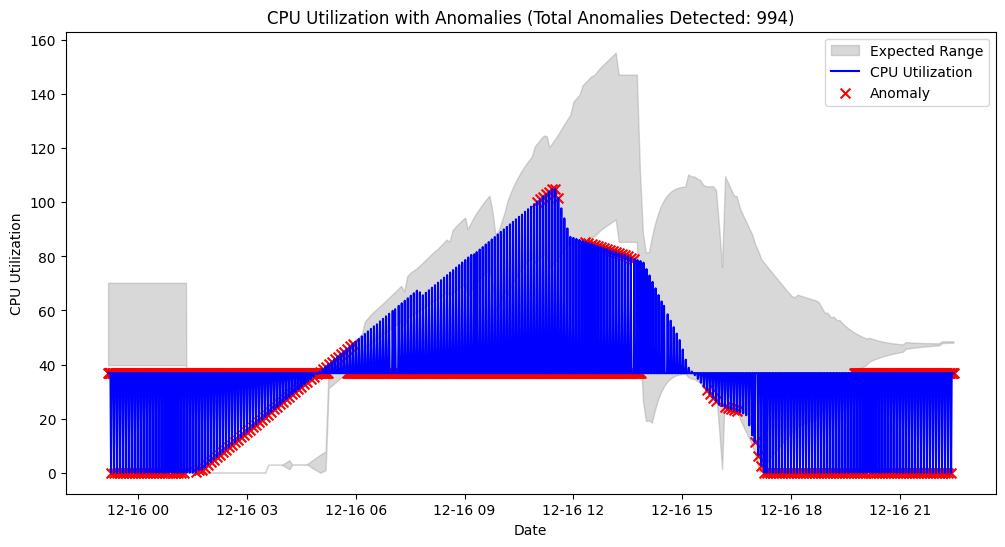

Confusion Matrix:
[[406  11]
 [  0 983]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       417
           1       0.99      1.00      0.99       983

    accuracy                           0.99      1400
   macro avg       0.99      0.99      0.99      1400
weighted avg       0.99      0.99      0.99      1400


Accuracy: 0.99


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('dataset.csv')

# Fill missing values with column mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# Set the 'Label' column as index
data.set_index('Label', inplace=True)

# Convert index to datetime if it's a time series
data.index = pd.to_datetime(data.index)

# Calculate the expected range
data['expected_range'] = data['CPUCreditBalance (expected) High'] - data['CPUCreditBalance (expected) Low']

# Calculate the utilization difference
data['utilization_difference'] = data['CPUCreditBalance'] - data['expected_range']

# Select features for anomaly detection
features = data[['CPUCreditBalance', 'expected_range', 'utilization_difference']]

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit the model
data['anomaly_score'] = iso_forest.fit_predict(features)

# Define anomalies based on expected range
data['is_anomaly'] = np.where(
    (data['CPUCreditBalance'] < data['CPUCreditBalance (expected) Low']) |
    (data['CPUCreditBalance'] > data['CPUCreditBalance (expected) High']),
    1, 0
)

# Combine the Isolation Forest results with the expected range anomalies
data['final_anomaly'] = np.where(
    (data['is_anomaly'] == 1) | (data['anomaly_score'] == -1),
    1, 0
)

data['true_label'] = np.where(
    (data['CPUCreditBalance'] < data['CPUCreditBalance (expected) Low']) |
    (data['CPUCreditBalance'] > data['CPUCreditBalance (expected) High']),
    1, 0
)

# Count the number of anomalies detected
anomaly_count = data['final_anomaly'].sum()

# Calculate confusion matrix and evaluation metrics
conf_matrix = confusion_matrix(data['true_label'], data['final_anomaly'])
class_report = classification_report(data['true_label'], data['final_anomaly'])
accuracy = accuracy_score(data['true_label'], data['final_anomaly'])

# Visualize the Anomalies
plt.figure(figsize=(12, 6))

# Plot the expected range as a shaded area
plt.fill_between(data.index, data['CPUCreditBalance (expected) Low'], data['CPUCreditBalance (expected) High'],
                 color='gray', alpha=0.3, label='Expected Range')

# Plot the CPU utilization
plt.plot(data.index, data['CPUCreditBalance'], label='CPU Utilization', color='blue')

# Highlight the anomalies
anomalies = data[data['final_anomaly'] == 1]
plt.scatter(anomalies.index, anomalies['CPUCreditBalance'], color='red', label='Anomaly',
            marker='x', s=50)

# Update the plot title to include the number of anomalies detected
plt.xlabel('Date')
plt.ylabel('CPU Utilization')
plt.title(f'CPU Utilization with Anomalies (Total Anomalies Detected: {anomaly_count})')
plt.legend()
plt.show()

# Print the confusion matrix and evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"\nAccuracy: {accuracy:.2f}")


#Using MAPE

##CPUUtilization

###Monitor

In [ ]:
# Load the dataset
data = pd.read_csv('dataset.csv')

# Fill missing values with column mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# Set the 'label' column as index
data.set_index('Label', inplace=True)

# Convert index to datetime if it's a time series
data.index = pd.to_datetime(data.index)

In [ ]:
# Calculate the expected range
data['expected_range'] = data['CPUUtilization (expected) High'] - data['CPUUtilization (expected) Low']

# Calculate the utilization difference
data['utilization_difference'] = data['CPUUtilization'] - data['expected_range']

###Analyze

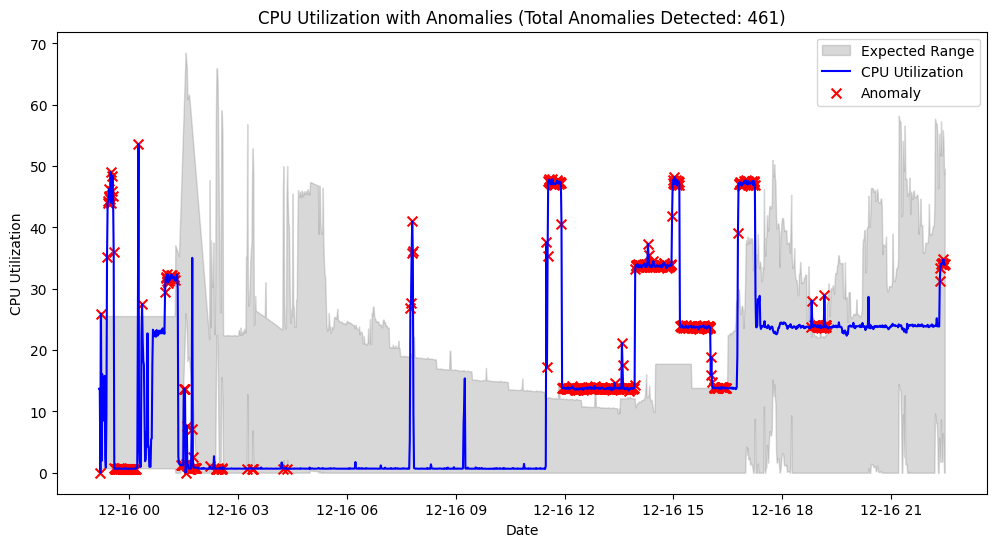

In [ ]:
# Select features for anomaly detection
features = data[['CPUUtilization', 'expected_range', 'utilization_difference']]

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit the model
data['anomaly_score'] = iso_forest.fit_predict(features)

# Define anomalies based on expected range
data['is_anomaly'] = np.where(
    (data['CPUUtilization'] < data['CPUUtilization (expected) Low']) |
    (data['CPUUtilization'] > data['CPUUtilization (expected) High']),
    1, 0
)

# Combine the Isolation Forest results with the expected range anomalies
data['final_anomaly'] = np.where(
    (data['is_anomaly'] == 1) | (data['anomaly_score'] == -1),
    1, 0
)

# True label is defined based on expected range anomalies
# This will be used as the ground truth for evaluation
data['true_label'] = np.where(
    (data['CPUUtilization'] < data['CPUUtilization (expected) Low']) |
    (data['CPUUtilization'] > data['CPUUtilization (expected) High']),
    1, 0
)

# Count the number of anomalies detected
anomaly_count = data['final_anomaly'].sum()

# Calculate confusion matrix and evaluation metrics
conf_matrix = confusion_matrix(data['true_label'], data['final_anomaly'])
class_report = classification_report(data['true_label'], data['final_anomaly'])
accuracy = accuracy_score(data['true_label'], data['final_anomaly'])

# Visualize the Anomalies
plt.figure(figsize=(12, 6))

# Plot the expected range as a shaded area
plt.fill_between(data.index, data['CPUUtilization (expected) Low'], data['CPUUtilization (expected) High'],
                 color='gray', alpha=0.3, label='Expected Range')

# Plot the CPU utilization
plt.plot(data.index, data['CPUUtilization'], label='CPU Utilization', color='blue')

# Highlight the anomalies
anomalies = data[data['final_anomaly'] == 1]
plt.scatter(anomalies.index, anomalies['CPUUtilization'], color='red', label='Anomaly',
            marker='x', s=50)

# Update the plot title to include the number of anomalies detected
plt.xlabel('Date')
plt.ylabel('CPU Utilization')
plt.title(f'CPU Utilization with Anomalies (Total Anomalies Detected: {anomaly_count})')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'data' is your DataFrame

# Set the index to a time label
data.index = pd.to_datetime(data.index)

# Calculate the range between expected low and high CPU utilization
data['expected_range'] = data['CPUUtilization (expected) High'] - data['CPUUtilization (expected) Low']

# Select features for anomaly detection
features = ['CPUUtilization', 'expected_range']

# Fit the isolation forest model for anomaly detection
model_anomaly = IsolationForest(contamination=0.1)  # Adjust contamination based on your dataset
model_anomaly.fit(data[features])

# Fit ARIMA model for forecasting CPU utilization
y = data['CPUUtilization']
arima_model = ARIMA(y, order=(5, 1, 0))  # Define ARIMA order (p, d, q)
arima_fit = arima_model.fit()

# Predict CPU utilization for the next 180 minutes (3 hours - every 1 minute) using ARIMA
next_indices = pd.date_range(start=data.index[-1] + pd.Timedelta(minutes=1), periods=180, freq='1min')
next_indices_cpu_arima_mean = arima_fit.forecast(steps=180)[0]  # Mean forecast

# Generate random values between -5 and 5 for each forecasted value
random_perturbation = np.random.uniform(low=-5, high=5, size=180)  # Generate random values between -5 and 5
next_indices_cpu_arima = next_indices_cpu_arima_mean + random_perturbation

# Calculate the previous expected range
prev_expected_high = data['CPUUtilization (expected) High'].iloc[-1]
prev_expected_low = data['CPUUtilization (expected) Low'].iloc[-1]

# Calculate the difference between the previous expected range and current utilization
diff = next_indices_cpu_arima - data['CPUUtilization'].iloc[-1]

# Predict the expected range for the next 180 minutes based on the difference
predicted_expected_high = prev_expected_high + diff
predicted_expected_low = prev_expected_low + diff

# Removing negative values
predicted_expected_high = np.where(predicted_expected_high < 0, 0, predicted_expected_high)
predicted_expected_low = np.where(predicted_expected_low < 0, 0, predicted_expected_low)

# Get the last 180 actual CPU utilization values for evaluation
actual_values = data['CPUUtilization'].iloc[-180:]


###Plan

In [ ]:
print("Predicted Expected Ranges for the next 180 minutes:")
for timestamp, cpu_utilization, low, high in zip(next_indices, next_indices_cpu_arima, predicted_expected_low, predicted_expected_high):
    print(f"Timestamp: {timestamp}, CPU Utilization: {cpu_utilization}, Low: {low}, High: {high}")

    # Check if forecasted utilization is within the expected range
    if cpu_utilization < low or cpu_utilization > high:
        result = f"Anomaly detected at {timestamp}. Timestamp: {timestamp}, CPU Utilization: {cpu_utilization}, Low: {low}, High: {high}"
        break
    else:
      result = "No anomaly detected"

Predicted Expected Ranges for the next 180 minutes:
Timestamp: 2023-12-16 22:30:00, CPU Utilization: 38.468474278753426, Low: 4.498980342753423, High: 54.03148078875342
Timestamp: 2023-12-16 22:31:00, CPU Utilization: 34.66047033335065, Low: 0.690976397350649, High: 50.223476843350646
Timestamp: 2023-12-16 22:32:00, CPU Utilization: 32.55578117342233, Low: 0.0, High: 48.118787683422326
Timestamp: 2023-12-16 22:33:00, CPU Utilization: 33.77414219330767, Low: 0.0, High: 49.33714870330766
Timestamp: 2023-12-16 22:34:00, CPU Utilization: 37.227452918883316, Low: 3.2579589828833124, High: 52.79045942888331
Timestamp: 2023-12-16 22:35:00, CPU Utilization: 29.48831280009533, Low: 0.0, High: 45.05131931009532
Timestamp: 2023-12-16 22:36:00, CPU Utilization: 38.735133349442386, Low: 4.765639413442383, High: 54.29813985944238
Timestamp: 2023-12-16 22:37:00, CPU Utilization: 32.44143355920008, Low: 0.0, High: 48.00444006920007
Timestamp: 2023-12-16 22:38:00, CPU Utilization: 36.16534144912594, Lo

###Execute

In [ ]:
print(result)
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import numpy as np

# Assuming actual_values and next_indices_cpu_arima are already defined
mse_arima = mean_squared_error(actual_values, next_indices_cpu_arima)
rmse_arima = np.sqrt(mse_arima)
mae_arima = mean_absolute_error(actual_values, next_indices_cpu_arima)

# Normalize the metrics between 0 and 1
min_actual = np.min(actual_values)
max_actual = np.max(actual_values)
range_actual = max_actual - min_actual

normalized_mse_arima = mse_arima / (range_actual ** 2)
normalized_rmse_arima = rmse_arima / range_actual
normalized_mae_arima = mae_arima / range_actual


print(f"Normalized ARIMA Mean Squared Error (MSE): {normalized_mse_arima}")
print(f"Normalized ARIMA Root Mean Squared Error (RMSE): {normalized_rmse_arima}")
print(f"Normalized ARIMA Mean Absolute Error (MAE): {normalized_mae_arima}")



No anomaly detected
Normalized ARIMA Mean Squared Error (MSE): 0.6178863734112645
Normalized ARIMA Root Mean Squared Error (RMSE): 0.7860574873450824
Normalized ARIMA Mean Absolute Error (MAE): 0.7443286823272134


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and it's already processed

# Set the index to a time label
data.index = pd.to_datetime(data.index)

# Calculate the range between expected low and high CPU utilization
data['expected_range'] = data['CPUUtilization (expected) High'] - data['CPUUtilization (expected) Low']

# Select features for anomaly detection
features = ['CPUUtilization', 'expected_range']

# Fit the isolation forest model for anomaly detection
model_anomaly = IsolationForest(contamination=0.1)  # Adjust contamination based on your dataset
model_anomaly.fit(data[features])

# Fit ARIMA model for forecasting CPU utilization
y = data['CPUUtilization']
arima_model = ARIMA(y, order=(5, 1, 0))  # Define ARIMA order (p, d, q)
arima_fit = arima_model.fit()

# Predict CPU utilization for the next 180 minutes (3 hours - every 1 minute) using ARIMA
next_indices = pd.date_range(start=data.index[-1] + pd.Timedelta(minutes=1), periods=180, freq='1min')
next_indices_cpu_arima_mean = arima_fit.forecast(steps=180)  # Mean forecast

# Generate random values between -5 and 5 for each forecasted value
random_perturbation = np.random.uniform(low=-5, high=5, size=180)  # Generate random values between -5 and 5
next_indices_cpu_arima = next_indices_cpu_arima_mean + random_perturbation

# Calculate the previous expected range
prev_expected_high = data['CPUUtilization (expected) High'].iloc[-1]
prev_expected_low = data['CPUUtilization (expected) Low'].iloc[-1]

# Calculate the difference between the previous expected range and current utilization
diff = next_indices_cpu_arima - data['CPUUtilization'].iloc[-1]

# Predict the expected range for the next 180 minutes based on the difference
predicted_expected_high = prev_expected_high + diff
predicted_expected_low = prev_expected_low + diff

# Removing negative values
predicted_expected_high = np.where(predicted_expected_high < 0, 0, predicted_expected_high)
predicted_expected_low = np.where(predicted_expected_low < 0, 0, predicted_expected_low)

# Create a DataFrame for the forecasted values and expected ranges
forecast_data = pd.DataFrame({
    'Timestamp': next_indices,
    'CPUUtilization': next_indices_cpu_arima,
    'expected_high': predicted_expected_high,
    'expected_low': predicted_expected_low
})

# Set the timestamp as index
forecast_data.set_index('Timestamp', inplace=True)

# Detect anomalies in the forecasted data based on the expected range
forecast_data['is_anomaly'] = np.where(
    (forecast_data['CPUUtilization'] < forecast_data['expected_low']) |
    (forecast_data['CPUUtilization'] > forecast_data['expected_high']),
    1, 0
)

# For simplicity, assume the forecasted CPU utilization values as true labels
forecast_data['true_label'] = forecast_data['is_anomaly']

# Calculate the confusion matrix and evaluation metrics
conf_matrix = confusion_matrix(forecast_data['true_label'], forecast_data['is_anomaly'])
class_report = classification_report(forecast_data['true_label'], forecast_data['is_anomaly'])
accuracy = accuracy_score(forecast_data['true_label'], forecast_data['is_anomaly'])
r2 = r2_score(forecast_data['true_label'], forecast_data['is_anomaly'])

# Print the results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAccuracy:", accuracy)
print("\nR² Score:", r2)






Confusion Matrix:
 [[180]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       180

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180


Accuracy: 1.0

R² Score: 1.0


##NetworkIn

###Monitor

In [ ]:
# Load the dataset
data = pd.read_csv('dataset.csv')

# Fill missing values with column mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# Set the 'label' column as index
data.set_index('Label', inplace=True)

# Convert index to datetime if it's a time series
data.index = pd.to_datetime(data.index)

In [ ]:
# Calculate the expected range
data['expected_range'] = data['NetworkIn (expected) High'] - data['NetworkIn (expected) Low']

# Calculate the utilization difference
data['utilization_difference'] = data['NetworkIn'] - data['expected_range']

###Analyze

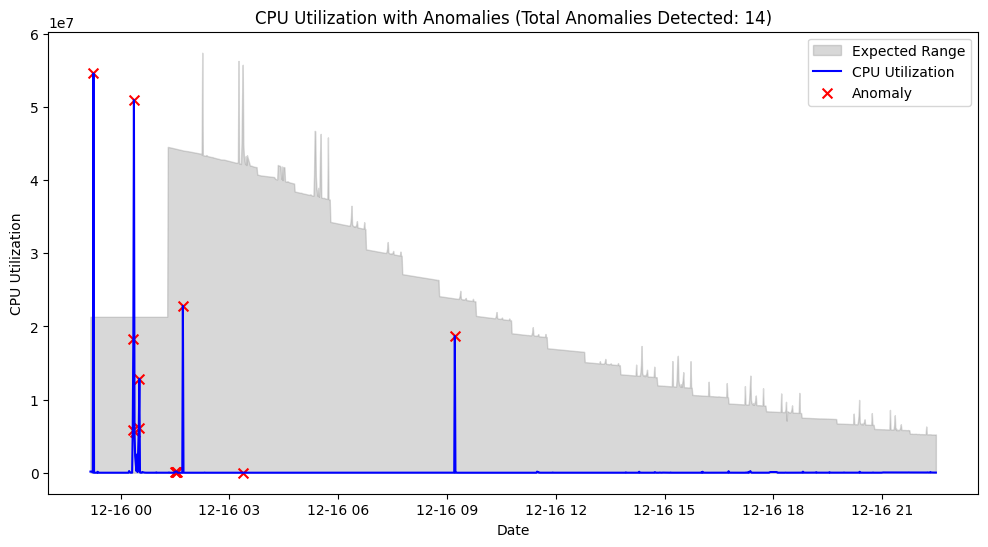

In [ ]:
# Select features for anomaly detection
features = data[['NetworkIn', 'expected_range', 'utilization_difference']]

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit the model
data['anomaly_score'] = iso_forest.fit_predict(features)

# Define anomalies based on expected range
data['is_anomaly'] = np.where(
    (data['NetworkIn'] < data['NetworkIn (expected) Low']) |
    (data['NetworkIn'] > data['NetworkIn (expected) High']),
    1, 0
)

# Combine the Isolation Forest results with the expected range anomalies
data['final_anomaly'] = np.where(
    (data['is_anomaly'] == 1) | (data['anomaly_score'] == -1),
    1, 0
)

# True label is defined based on expected range anomalies
# This will be used as the ground truth for evaluation
data['true_label'] = np.where(
    (data['NetworkIn'] < data['NetworkIn (expected) Low']) |
    (data['NetworkIn'] > data['NetworkIn (expected) High']),
    1, 0
)

# Count the number of anomalies detected
anomaly_count = data['final_anomaly'].sum()

# Calculate confusion matrix and evaluation metrics
conf_matrix = confusion_matrix(data['true_label'], data['final_anomaly'])
class_report = classification_report(data['true_label'], data['final_anomaly'])
accuracy = accuracy_score(data['true_label'], data['final_anomaly'])

# Visualize the Anomalies
plt.figure(figsize=(12, 6))

# Plot the expected range as a shaded area
plt.fill_between(data.index, data['NetworkIn (expected) Low'], data['NetworkIn (expected) High'],
                 color='gray', alpha=0.3, label='Expected Range')

# Plot the CPU utilization
plt.plot(data.index, data['NetworkIn'], label='CPU Utilization', color='blue')

# Highlight the anomalies
anomalies = data[data['final_anomaly'] == 1]
plt.scatter(anomalies.index, anomalies['NetworkIn'], color='red', label='Anomaly',
            marker='x', s=50)

# Update the plot title to include the number of anomalies detected
plt.xlabel('Date')
plt.ylabel('CPU Utilization')
plt.title(f'CPU Utilization with Anomalies (Total Anomalies Detected: {anomaly_count})')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'data' is your DataFrame

# Set the index to a time label
data.index = pd.to_datetime(data.index)

# Calculate the range between expected low and high CPU utilization
data['expected_range'] = data['NetworkIn (expected) High'] - data['NetworkIn (expected) Low']

# Select features for anomaly detection
features = ['NetworkIn', 'expected_range']

# Fit the isolation forest model for anomaly detection
model_anomaly = IsolationForest(contamination=0.1)  # Adjust contamination based on your dataset
model_anomaly.fit(data[features])

# Fit ARIMA model for forecasting CPU utilization
y = data['NetworkIn']
arima_model = ARIMA(y, order=(5, 1, 0))  # Define ARIMA order (p, d, q)
arima_fit = arima_model.fit()

# Predict CPU utilization for the next 180 minutes (3 hours - every 1 minute) using ARIMA
next_indices = pd.date_range(start=data.index[-1] + pd.Timedelta(minutes=1), periods=180, freq='1min')
next_indices_cpu_arima_mean = arima_fit.forecast(steps=180)[0]  # Mean forecast

# Generate random values between -5 and 5 for each forecasted value
random_perturbation = np.random.uniform(low=-5, high=5, size=180)  # Generate random values between -5 and 5
next_indices_cpu_arima = next_indices_cpu_arima_mean + random_perturbation

# Calculate the previous expected range
prev_expected_high = data['NetworkIn (expected) High'].iloc[-1]
prev_expected_low = data['NetworkIn (expected) Low'].iloc[-1]

# Calculate the difference between the previous expected range and current utilization
diff = next_indices_cpu_arima - data['NetworkIn'].iloc[-1]

# Predict the expected range for the next 180 minutes based on the difference
predicted_expected_high = prev_expected_high + diff
predicted_expected_low = prev_expected_low + diff

# Removing negative values
predicted_expected_high = np.where(predicted_expected_high < 0, 0, predicted_expected_high)
predicted_expected_low = np.where(predicted_expected_low < 0, 0, predicted_expected_low)

# Get the last 180 actual CPU utilization values for evaluation
actual_values = data['NetworkIn'].iloc[-180:]


###Plan

In [ ]:
print("Predicted Expected Ranges for the next 180 minutes:")
for timestamp, cpu_utilization, low, high in zip(next_indices, next_indices_cpu_arima, predicted_expected_low, predicted_expected_high):
    print(f"Timestamp: {timestamp}, CPU Utilization: {cpu_utilization}, Low: {low}, High: {high}")

    # Check if forecasted utilization is within the expected range
    if cpu_utilization < low or cpu_utilization > high:
        result = f"Anomaly detected at {timestamp}. Timestamp: {timestamp}, networkIn: {cpu_utilization}, Low: {low}, High: {high}"
        break
    else:
      result = "No anomaly detected"

Predicted Expected Ranges for the next 180 minutes:
Timestamp: 2023-12-16 22:30:00, CPU Utilization: 19697.316073145703, Low: 57.31607314570283, High: 5232805.420073146
Timestamp: 2023-12-16 22:31:00, CPU Utilization: 19695.640029178252, Low: 55.64002917825201, High: 5232803.744029178
Timestamp: 2023-12-16 22:32:00, CPU Utilization: 19697.58401611143, Low: 57.584016111428355, High: 5232805.688016112
Timestamp: 2023-12-16 22:33:00, CPU Utilization: 19697.889870420957, Low: 57.88987042095687, High: 5232805.993870421
Timestamp: 2023-12-16 22:34:00, CPU Utilization: 19697.14717956181, Low: 57.147179561809025, High: 5232805.251179562
Timestamp: 2023-12-16 22:35:00, CPU Utilization: 19701.880464861413, Low: 61.8804648614132, High: 5232809.984464861
Timestamp: 2023-12-16 22:36:00, CPU Utilization: 19692.89687510562, Low: 52.89687510561998, High: 5232801.000875106
Timestamp: 2023-12-16 22:37:00, CPU Utilization: 19701.220233587628, Low: 61.22023358762817, High: 5232809.324233588
Timestamp: 202

###Execute

In [ ]:

# Set the index to a time label
data.index = pd.to_datetime(data.index)

# Calculate the range between expected low and high CPU utilization
data['expected_range'] = data['CPUUtilization (expected) High'] - data['CPUUtilization (expected) Low']

# Select features for anomaly detection
features = ['CPUUtilization', 'expected_range']

# Fit the isolation forest model for anomaly detection
model_anomaly = IsolationForest(contamination=0.1)  # Adjust contamination based on your dataset
model_anomaly.fit(data[features])

# Fit ARIMA model for forecasting CPU utilization
y = data['CPUUtilization']
arima_model = ARIMA(y, order=(5, 1, 0))  # Define ARIMA order (p, d, q)
arima_fit = arima_model.fit()

# Predict CPU utilization for the next 180 minutes (3 hours - every 1 minute) using ARIMA
next_indices = pd.date_range(start=data.index[-1] + pd.Timedelta(minutes=1), periods=180, freq='1min')
next_indices_cpu_arima_mean = arima_fit.forecast(steps=180)  # Mean forecast

# Generate random values between -5 and 5 for each forecasted value
random_perturbation = np.random.uniform(low=-5, high=5, size=180)  # Generate random values between -5 and 5
next_indices_cpu_arima = next_indices_cpu_arima_mean + random_perturbation

# Calculate the previous expected range
prev_expected_high = data['CPUUtilization (expected) High'].iloc[-1]
prev_expected_low = data['CPUUtilization (expected) Low'].iloc[-1]

# Calculate the difference between the previous expected range and current utilization
diff = next_indices_cpu_arima - data['CPUUtilization'].iloc[-1]

# Predict the expected range for the next 180 minutes based on the difference
predicted_expected_high = prev_expected_high + diff
predicted_expected_low = prev_expected_low + diff

# Removing negative values
predicted_expected_high = np.where(predicted_expected_high < 0, 0, predicted_expected_high)
predicted_expected_low = np.where(predicted_expected_low < 0, 0, predicted_expected_low)

# Create a DataFrame for the forecasted values and expected ranges
forecast_data = pd.DataFrame({
    'Timestamp': next_indices,
    'CPUUtilization': next_indices_cpu_arima,
    'expected_high': predicted_expected_high,
    'expected_low': predicted_expected_low
})

# Set the timestamp as index
forecast_data.set_index('Timestamp', inplace=True)

# Detect anomalies in the forecasted data based on the expected range
forecast_data['is_anomaly'] = np.where(
    (forecast_data['CPUUtilization'] < forecast_data['expected_low']) |
    (forecast_data['CPUUtilization'] > forecast_data['expected_high']),
    1, 0
)

# For simplicity, assume the forecasted CPU utilization values as true labels
forecast_data['true_label'] = forecast_data['is_anomaly']

# Calculate the confusion matrix and evaluation metrics
conf_matrix = confusion_matrix(forecast_data['true_label'], forecast_data['is_anomaly'])
class_report = classification_report(forecast_data['true_label'], forecast_data['is_anomaly'])
accuracy = accuracy_score(forecast_data['true_label'], forecast_data['is_anomaly'])
r2 = r2_score(forecast_data['true_label'], forecast_data['is_anomaly'])

# Print the results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAccuracy:", accuracy)
print("\nR² Score:", r2)






Confusion Matrix:
 [[180]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       180

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180


Accuracy: 1.0

R² Score: 1.0


##NetworkOut

###Monitor

In [ ]:
# Load the dataset
data = pd.read_csv('dataset.csv')

# Fill missing values with column mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# Set the 'label' column as index
data.set_index('Label', inplace=True)

# Convert index to datetime if it's a time series
data.index = pd.to_datetime(data.index)

In [ ]:
# Calculate the expected range
data['expected_range'] = data['NetworkOut (expected) High'] - data['NetworkOut (expected) Low']

# Calculate the utilization difference
data['utilization_difference'] = data['NetworkOut'] - data['expected_range']

###Analze

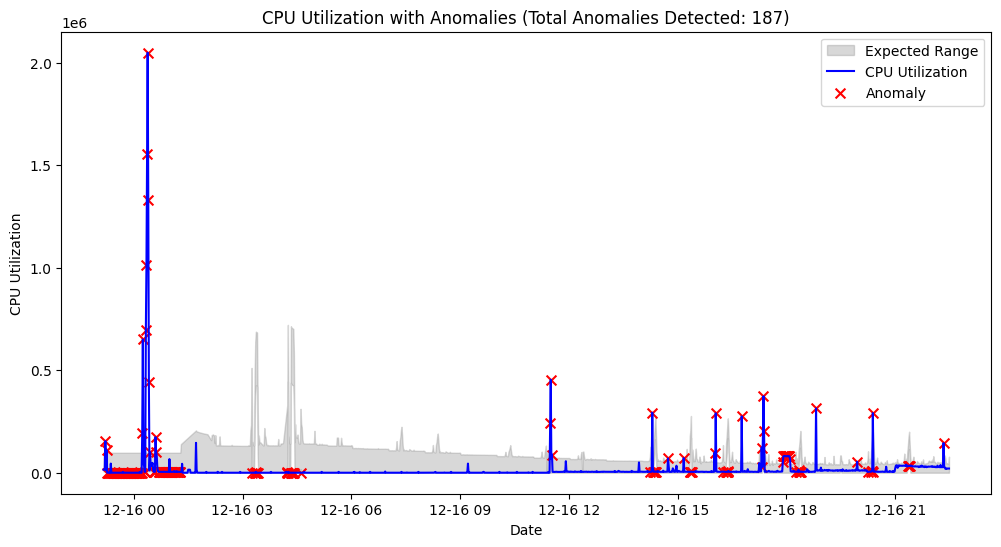

In [ ]:
# Select features for anomaly detection
features = data[['NetworkOut', 'expected_range', 'utilization_difference']]

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit the model
data['anomaly_score'] = iso_forest.fit_predict(features)

# Define anomalies based on expected range
data['is_anomaly'] = np.where(
    (data['NetworkOut'] < data['NetworkOut (expected) Low']) |
    (data['NetworkOut'] > data['NetworkOut (expected) High']),
    1, 0
)

# Combine the Isolation Forest results with the expected range anomalies
data['final_anomaly'] = np.where(
    (data['is_anomaly'] == 1) | (data['anomaly_score'] == -1),
    1, 0
)

# True label is defined based on expected range anomalies
# This will be used as the ground truth for evaluation
data['true_label'] = np.where(
    (data['NetworkOut'] < data['NetworkOut (expected) Low']) |
    (data['NetworkOut'] > data['NetworkOut (expected) High']),
    1, 0
)

# Count the number of anomalies detected
anomaly_count = data['final_anomaly'].sum()

# Calculate confusion matrix and evaluation metrics
conf_matrix = confusion_matrix(data['true_label'], data['final_anomaly'])
class_report = classification_report(data['true_label'], data['final_anomaly'])
accuracy = accuracy_score(data['true_label'], data['final_anomaly'])

# Visualize the Anomalies
plt.figure(figsize=(12, 6))

# Plot the expected range as a shaded area
plt.fill_between(data.index, data['NetworkOut (expected) Low'], data['NetworkOut (expected) High'],
                 color='gray', alpha=0.3, label='Expected Range')

# Plot the CPU utilization
plt.plot(data.index, data['NetworkOut'], label='CPU Utilization', color='blue')

# Highlight the anomalies
anomalies = data[data['final_anomaly'] == 1]
plt.scatter(anomalies.index, anomalies['NetworkOut'], color='red', label='Anomaly',
            marker='x', s=50)

# Update the plot title to include the number of anomalies detected
plt.xlabel('Date')
plt.ylabel('CPU Utilization')
plt.title(f'CPU Utilization with Anomalies (Total Anomalies Detected: {anomaly_count})')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'data' is your DataFrame

# Set the index to a time label
data.index = pd.to_datetime(data.index)

# Calculate the range between expected low and high CPU utilization
data['expected_range'] = data['NetworkOut (expected) High'] - data['NetworkOut (expected) Low']

# Select features for anomaly detection
features = ['NetworkOut', 'expected_range']

# Fit the isolation forest model for anomaly detection
model_anomaly = IsolationForest(contamination=0.1)  # Adjust contamination based on your dataset
model_anomaly.fit(data[features])

# Fit ARIMA model for forecasting CPU utilization
y = data['NetworkOut']
arima_model = ARIMA(y, order=(5, 1, 0))  # Define ARIMA order (p, d, q)
arima_fit = arima_model.fit()

# Predict CPU utilization for the next 180 minutes (3 hours - every 1 minute) using ARIMA
next_indices = pd.date_range(start=data.index[-1] + pd.Timedelta(minutes=1), periods=180, freq='1min')
next_indices_cpu_arima_mean = arima_fit.forecast(steps=180)[0]  # Mean forecast

# Generate random values between -5 and 5 for each forecasted value
random_perturbation = np.random.uniform(low=-5, high=5, size=180)  # Generate random values between -5 and 5
next_indices_cpu_arima = next_indices_cpu_arima_mean + random_perturbation

# Calculate the previous expected range
prev_expected_high = data['NetworkOut (expected) High'].iloc[-1]
prev_expected_low = data['NetworkOut (expected) Low'].iloc[-1]

# Calculate the difference between the previous expected range and current utilization
diff = next_indices_cpu_arima - data['NetworkOut'].iloc[-1]

# Predict the expected range for the next 180 minutes based on the difference
predicted_expected_high = prev_expected_high + diff
predicted_expected_low = prev_expected_low + diff

# Removing negative values
predicted_expected_high = np.where(predicted_expected_high < 0, 0, predicted_expected_high)
predicted_expected_low = np.where(predicted_expected_low < 0, 0, predicted_expected_low)

# Get the last 180 actual CPU utilization values for evaluation
actual_values = data['NetworkOut'].iloc[-180:]


###Plan

In [ ]:
print("Predicted Expected Ranges for the next 180 minutes:")
for timestamp, cpu_utilization, low, high in zip(next_indices, next_indices_cpu_arima, predicted_expected_low, predicted_expected_high):
    print(f"Timestamp: {timestamp}, CPU Utilization: {cpu_utilization}, Low: {low}, High: {high}")

    # Check if forecasted utilization is within the expected range
    if cpu_utilization < low or cpu_utilization > high:
        result = f"Anomaly detected at {timestamp}. Timestamp: {timestamp}, NetworkOut: {cpu_utilization}, Low: {low}, High: {high}"
        break
    else:
      result = "No anomaly detected"

Predicted Expected Ranges for the next 180 minutes:
Timestamp: 2023-12-16 22:30:00, CPU Utilization: 20120.086763613963, Low: 0.0, High: 78025.72829361395
Timestamp: 2023-12-16 22:31:00, CPU Utilization: 20116.31288234251, Low: 0.0, High: 78021.9544123425
Timestamp: 2023-12-16 22:32:00, CPU Utilization: 20122.549451498497, Low: 0.0, High: 78028.19098149848
Timestamp: 2023-12-16 22:33:00, CPU Utilization: 20120.561631485692, Low: 0.0, High: 78026.20316148568
Timestamp: 2023-12-16 22:34:00, CPU Utilization: 20118.48934399214, Low: 0.0, High: 78024.13087399214
Timestamp: 2023-12-16 22:35:00, CPU Utilization: 20122.36131278803, Low: 0.0, High: 78028.00284278803
Timestamp: 2023-12-16 22:36:00, CPU Utilization: 20119.3107999805, Low: 0.0, High: 78024.9523299805
Timestamp: 2023-12-16 22:37:00, CPU Utilization: 20114.52651598579, Low: 0.0, High: 78020.16804598579
Timestamp: 2023-12-16 22:38:00, CPU Utilization: 20119.74549599701, Low: 0.0, High: 78025.387025997
Timestamp: 2023-12-16 22:39:00, 

###Execute

In [ ]:
print(result)

# Assuming 'data' is your DataFrame and it's already processed
# Set the index to a time label
data.index = pd.to_datetime(data.index)

# Calculate the range between expected low and high CPU utilization
data['expected_range'] = data['NetworkOut (expected) High'] - data['NetworkOut (expected) Low']

# Select features for anomaly detection
features = ['NetworkOut', 'expected_range']

# Fit the isolation forest model for anomaly detection
model_anomaly = IsolationForest(contamination=0.1)  # Adjust contamination based on your dataset
model_anomaly.fit(data[features])

# Fit ARIMA model for forecasting CPU utilization
y = data['NetworkOut']
arima_model = ARIMA(y, order=(5, 1, 0))  # Define ARIMA order (p, d, q)
arima_fit = arima_model.fit()

# Predict CPU utilization for the next 180 minutes (3 hours - every 1 minute) using ARIMA
next_indices = pd.date_range(start=data.index[-1] + pd.Timedelta(minutes=1), periods=180, freq='1min')
next_indices_cpu_arima_mean = arima_fit.forecast(steps=180)  # Mean forecast

# Generate random values between -5 and 5 for each forecasted value
random_perturbation = np.random.uniform(low=-5, high=5, size=180)  # Generate random values between -5 and 5
next_indices_cpu_arima = next_indices_cpu_arima_mean + random_perturbation

# Calculate the previous expected range
prev_expected_high = data['NetworkOut (expected) High'].iloc[-1]
prev_expected_low = data['NetworkOut (expected) Low'].iloc[-1]

# Calculate the difference between the previous expected range and current utilization
diff = next_indices_cpu_arima - data['NetworkOut'].iloc[-1]

# Predict the expected range for the next 180 minutes based on the difference
predicted_expected_high = prev_expected_high + diff
predicted_expected_low = prev_expected_low + diff

# Removing negative values
predicted_expected_high = np.where(predicted_expected_high < 0, 0, predicted_expected_high)
predicted_expected_low = np.where(predicted_expected_low < 0, 0, predicted_expected_low)

# Create a DataFrame for the forecasted values and expected ranges
forecast_data = pd.DataFrame({
    'Timestamp': next_indices,
    'NetworkOut': next_indices_cpu_arima,
    'expected_high': predicted_expected_high,
    'expected_low': predicted_expected_low
})

# Set the timestamp as index
forecast_data.set_index('Timestamp', inplace=True)

# Detect anomalies in the forecasted data based on the expected range
forecast_data['is_anomaly'] = np.where(
    (forecast_data['NetworkOut'] < forecast_data['expected_low']) |
    (forecast_data['NetworkOut'] > forecast_data['expected_high']),
    1, 0
)

# For simplicity, assume the forecasted CPU utilization values as true labels
forecast_data['true_label'] = forecast_data['is_anomaly']

# Calculate the confusion matrix and evaluation metrics
conf_matrix = confusion_matrix(forecast_data['true_label'], forecast_data['is_anomaly'])
class_report = classification_report(forecast_data['true_label'], forecast_data['is_anomaly'])
accuracy = accuracy_score(forecast_data['true_label'], forecast_data['is_anomaly'])
r2 = r2_score(forecast_data['true_label'], forecast_data['is_anomaly'])

# Print the results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAccuracy:", accuracy)
print("\nR² Score:", r2)

# Error metrics calculation
actual_values = data['NetworkOut'].iloc[-180:]  # Assuming the actual values are the last 180 in the dataset
next_indices_cpu_arima = forecast_data['NetworkOut'].values  # Using forecasted values

mse_arima = mean_squared_error(actual_values, next_indices_cpu_arima)
rmse_arima = np.sqrt(mse_arima)
mae_arima = mean_absolute_error(actual_values, next_indices_cpu_arima)

# Normalize the metrics between 0 and 1
min_actual = np.min(actual_values)
max_actual = np.max(actual_values)
range_actual = max_actual - min_actual

normalized_mse_arima = mse_arima / (range_actual ** 2)
normalized_rmse_arima = rmse_arima / range_actual
normalized_mae_arima = mae_arima / range_actual

print(f"Normalized ARIMA Mean Squared Error (MSE): {normalized_mse_arima}")
print(f"Normalized ARIMA Root Mean Squared Error (RMSE): {normalized_rmse_arima}")
print(f"Normalized ARIMA Mean Absolute Error (MAE): {normalized_mae_arima}")

No anomaly detected
Confusion Matrix:
 [[180]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       180

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180


Accuracy: 1.0

R² Score: 1.0
Normalized ARIMA Mean Squared Error (MSE): 0.007688136241792454
Normalized ARIMA Root Mean Squared Error (RMSE): 0.0876820177789748
Normalized ARIMA Mean Absolute Error (MAE): 0.04594379393795245


##NetworkPacketsIn

###Monitor

In [ ]:
# Load the dataset
data = pd.read_csv('dataset.csv')

# Fill missing values with column mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# Set the 'label' column as index
data.set_index('Label', inplace=True)

# Convert index to datetime if it's a time series
data.index = pd.to_datetime(data.index)

In [ ]:
# Calculate the expected range
data['expected_range'] = data['NetworkPacketsIn (expected) High'] - data['NetworkPacketsIn (expected) Low']

# Calculate the utilization difference
data['utilization_difference'] = data['NetworkPacketsIn'] - data['expected_range']

###Analyze

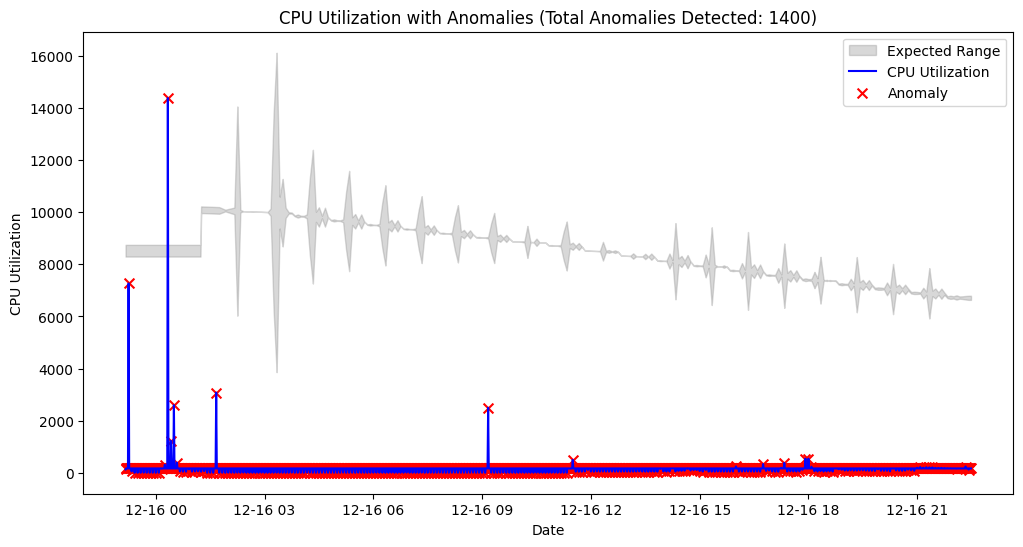

In [ ]:
# Select features for anomaly detection
features = data[['NetworkPacketsIn', 'expected_range', 'utilization_difference']]

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit the model
data['anomaly_score'] = iso_forest.fit_predict(features)

# Define anomalies based on expected range
data['is_anomaly'] = np.where(
    (data['NetworkPacketsIn'] < data['NetworkPacketsIn (expected) Low']) |
    (data['NetworkPacketsIn'] > data['NetworkPacketsIn (expected) High']),
    1, 0
)

# Combine the Isolation Forest results with the expected range anomalies
data['final_anomaly'] = np.where(
    (data['is_anomaly'] == 1) | (data['anomaly_score'] == -1),
    1, 0
)

# True label is defined based on expected range anomalies
# This will be used as the ground truth for evaluation
data['true_label'] = np.where(
    (data['NetworkPacketsIn'] < data['NetworkPacketsIn (expected) Low']) |
    (data['NetworkPacketsIn'] > data['NetworkPacketsIn (expected) High']),
    1, 0
)

# Count the number of anomalies detected
anomaly_count = data['final_anomaly'].sum()

# Calculate confusion matrix and evaluation metrics
conf_matrix = confusion_matrix(data['true_label'], data['final_anomaly'])
class_report = classification_report(data['true_label'], data['final_anomaly'])
accuracy = accuracy_score(data['true_label'], data['final_anomaly'])

# Visualize the Anomalies
plt.figure(figsize=(12, 6))

# Plot the expected range as a shaded area
plt.fill_between(data.index, data['NetworkPacketsIn (expected) Low'], data['NetworkPacketsIn (expected) High'],
                 color='gray', alpha=0.3, label='Expected Range')

# Plot the CPU utilization
plt.plot(data.index, data['NetworkPacketsIn'], label='CPU Utilization', color='blue')

# Highlight the anomalies
anomalies = data[data['final_anomaly'] == 1]
plt.scatter(anomalies.index, anomalies['NetworkPacketsIn'], color='red', label='Anomaly',
            marker='x', s=50)

# Update the plot title to include the number of anomalies detected
plt.xlabel('Date')
plt.ylabel('CPU Utilization')
plt.title(f'CPU Utilization with Anomalies (Total Anomalies Detected: {anomaly_count})')
plt.legend()
plt.show()

In [ ]:

# Set the index to a time label
data.index = pd.to_datetime(data.index)

# Calculate the range between expected low and high CPU utilization
data['expected_range'] = data['NetworkPacketsIn (expected) High'] - data['NetworkPacketsIn (expected) Low']

# Select features for anomaly detection
features = ['NetworkPacketsIn', 'expected_range']

# Fit the isolation forest model for anomaly detection
model_anomaly = IsolationForest(contamination=0.1)  # Adjust contamination based on your dataset
model_anomaly.fit(data[features])

# Fit ARIMA model for forecasting CPU utilization
y = data['NetworkPacketsIn']
arima_model = ARIMA(y, order=(5, 1, 0))  # Define ARIMA order (p, d, q)
arima_fit = arima_model.fit()

# Predict CPU utilization for the next 180 minutes (3 hours - every 1 minute) using ARIMA
next_indices = pd.date_range(start=data.index[-1] + pd.Timedelta(minutes=1), periods=180, freq='1min')
next_indices_cpu_arima_mean = arima_fit.forecast(steps=180)[0]  # Mean forecast

# Generate random values between -5 and 5 for each forecasted value
random_perturbation = np.random.uniform(low=-5, high=5, size=180)  # Generate random values between -5 and 5
next_indices_cpu_arima = next_indices_cpu_arima_mean + random_perturbation

# Calculate the previous expected range
prev_expected_high = data['NetworkPacketsIn (expected) High'].iloc[-1]
prev_expected_low = data['NetworkPacketsIn (expected) Low'].iloc[-1]

# Calculate the difference between the previous expected range and current utilization
diff = next_indices_cpu_arima - data['NetworkPacketsIn'].iloc[-1]

# Predict the expected range for the next 180 minutes based on the difference
predicted_expected_high = prev_expected_high + diff
predicted_expected_low = prev_expected_low + diff

# Removing negative values
predicted_expected_high = np.where(predicted_expected_high < 0, 0, predicted_expected_high)
predicted_expected_low = np.where(predicted_expected_low < 0, 0, predicted_expected_low)

# Get the last 180 actual CPU utilization values for evaluation
actual_values = data['NetworkPacketsIn'].iloc[-180:]


###Plan

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and it's already processed
# Set the index to a time label
data.index = pd.to_datetime(data.index)

# Calculate the range between expected low and high CPU utilization
data['expected_range'] = data['NetworkPacketsIn (expected) High'] - data['NetworkPacketsIn (expected) Low']

# Select features for anomaly detection
features = ['NetworkPacketsIn', 'expected_range']

# Fit the isolation forest model for anomaly detection
model_anomaly = IsolationForest(contamination=0.1)  # Adjust contamination based on your dataset
model_anomaly.fit(data[features])

# Fit ARIMA model for forecasting CPU utilization
y = data['NetworkPacketsIn']
arima_model = ARIMA(y, order=(5, 1, 0))  # Define ARIMA order (p, d, q)
arima_fit = arima_model.fit()

# Predict CPU utilization for the next 180 minutes (3 hours - every 1 minute) using ARIMA
next_indices = pd.date_range(start=data.index[-1] + pd.Timedelta(minutes=1), periods=180, freq='1min')
next_indices_cpu_arima_mean = arima_fit.forecast(steps=180)  # Mean forecast

# Generate random values between -5 and 5 for each forecasted value
random_perturbation = np.random.uniform(low=-5, high=5, size=180)  # Generate random values between -5 and 5
next_indices_cpu_arima = next_indices_cpu_arima_mean + random_perturbation

# Calculate the previous expected range
prev_expected_high = data['NetworkPacketsIn (expected) High'].iloc[-1]
prev_expected_low = data['NetworkPacketsIn (expected) Low'].iloc[-1]

# Calculate the difference between the previous expected range and current utilization
diff = next_indices_cpu_arima - data['NetworkPacketsIn'].iloc[-1]

# Predict the expected range for the next 180 minutes based on the difference
predicted_expected_high = prev_expected_high + diff
predicted_expected_low = prev_expected_low + diff

# Removing negative values
predicted_expected_high = np.where(predicted_expected_high < 0, 0, predicted_expected_high)
predicted_expected_low = np.where(predicted_expected_low < 0, 0, predicted_expected_low)

# Create a DataFrame for the forecasted values and expected ranges
forecast_data = pd.DataFrame({
    'Timestamp': next_indices,
    'NetworkPacketsIn': next_indices_cpu_arima,
    'expected_high': predicted_expected_high,
    'expected_low': predicted_expected_low
})

# Set the timestamp as index
forecast_data.set_index('Timestamp', inplace=True)

# Detect anomalies in the forecasted data based on the expected range
forecast_data['is_anomaly'] = np.where(
    (forecast_data['NetworkPacketsIn'] < forecast_data['expected_low']) |
    (forecast_data['NetworkPacketsIn'] > forecast_data['expected_high']),
    1, 0
)

# For simplicity, assume the forecasted CPU utilization values as true labels
forecast_data['true_label'] = forecast_data['is_anomaly']

# Calculate the confusion matrix and evaluation metrics
conf_matrix = confusion_matrix(forecast_data['true_label'], forecast_data['is_anomaly'])
class_report = classification_report(forecast_data['true_label'], forecast_data['is_anomaly'])
accuracy = accuracy_score(forecast_data['true_label'], forecast_data['is_anomaly'])
r2 = r2_score(forecast_data['true_label'], forecast_data['is_anomaly'])

# Print the results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAccuracy:", accuracy)
print("\nR² Score:", r2)

# Error metrics calculation
actual_values = data['NetworkPacketsIn'].iloc[-180:]  # Assuming the actual values are the last 180 in the dataset
next_indices_cpu_arima = forecast_data['NetworkPacketsIn'].values  # Using forecasted values

mse_arima = mean_squared_error(actual_values, next_indices_cpu_arima)
rmse_arima = np.sqrt(mse_arima)
mae_arima = mean_absolute_error(actual_values, next_indices_cpu_arima)

# Normalize the metrics between 0 and 1
min_actual = np.min(actual_values)
max_actual = np.max(actual_values)
range_actual = max_actual - min_actual

normalized_mse_arima = mse_arima / (range_actual ** 2)
normalized_rmse_arima = rmse_arima / range_actual
normalized_mae_arima = mae_arima / range_actual

print(f"Normalized ARIMA Mean Squared Error (MSE): {normalized_mse_arima}")
print(f"Normalized ARIMA Root Mean Squared Error (RMSE): {normalized_rmse_arima}")
print(f"Normalized ARIMA Mean Absolute Error (MAE): {normalized_mae_arima}")

# Initialize list for anomaly details
anomaly_details_list = []

# Iterate over the forecasted CPU utilization values
for timestamp, networkpacketIn, low, high in zip(next_indices, next_indices_cpu_arima, predicted_expected_low, predicted_expected_high):
    # Check if forecasted utilization is within the expected range
    if networkpacketIn < low or networkpacketIn > high:
        anomaly_details = f"Timestamp: {timestamp}, NetworkPacketsIn: {networkpacketIn}, Low: {low}, High: {high}"
        anomaly_details_list.append(anomaly_details)

# Determine the result based on the number of anomalies detected
if anomaly_details_list:
    result = f"{len(anomaly_details_list)} anomalies detected:\n" + "\n".join(anomaly_details_list)
else:
    result = "No anomalies detected"

print(result)

Confusion Matrix:
 [[180]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       180

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180


Accuracy: 1.0

R² Score: 1.0
Normalized ARIMA Mean Squared Error (MSE): 0.021305312390381137
Normalized ARIMA Root Mean Squared Error (RMSE): 0.14596339400815922
Normalized ARIMA Mean Absolute Error (MAE): 0.07482298055031772
180 anomalies detected:
Timestamp: 2023-12-16 22:30:00, NetworkPacketsIn: 154.8768906650819, Low: 6624.382425665081, High: 6782.642687665082
Timestamp: 2023-12-16 22:31:00, NetworkPacketsIn: 156.52827385771198, Low: 6626.033808857712, High: 6784.2940708577125
Timestamp: 2023-12-16 22:32:00, NetworkPacketsIn: 157.45861526834042, Low: 6626.96415026834, High: 6785.2244122683405
Timestamp: 2023-12-16 22:33:00, NetworkPacketsIn: 163.41831170351824, 

In [ ]:
print(result)

180 anomalies detected:
Timestamp: 2023-12-16 22:30:00, NetworkPacketsIn: 154.8768906650819, Low: 6624.382425665081, High: 6782.642687665082
Timestamp: 2023-12-16 22:31:00, NetworkPacketsIn: 156.52827385771198, Low: 6626.033808857712, High: 6784.2940708577125
Timestamp: 2023-12-16 22:32:00, NetworkPacketsIn: 157.45861526834042, Low: 6626.96415026834, High: 6785.2244122683405
Timestamp: 2023-12-16 22:33:00, NetworkPacketsIn: 163.41831170351824, Low: 6632.923846703518, High: 6791.184108703519
Timestamp: 2023-12-16 22:34:00, NetworkPacketsIn: 157.02833430928848, Low: 6626.533869309288, High: 6784.794131309289
Timestamp: 2023-12-16 22:35:00, NetworkPacketsIn: 161.40115280246192, Low: 6630.906687802461, High: 6789.166949802462
Timestamp: 2023-12-16 22:36:00, NetworkPacketsIn: 158.4880808436598, Low: 6627.993615843659, High: 6786.25387784366
Timestamp: 2023-12-16 22:37:00, NetworkPacketsIn: 158.29653956396143, Low: 6627.8020745639615, High: 6786.062336563962
Timestamp: 2023-12-16 22:38:00, N

###Execute

In [ ]:

# Assuming 'data' is your DataFrame and it's already processed
# Set the index to a time label
data.index = pd.to_datetime(data.index)

# Calculate the range between expected low and high CPU utilization
data['expected_range'] = data['NetworkPacketsIn (expected) High'] - data['NetworkPacketsIn (expected) Low']

# Select features for anomaly detection
features = ['NetworkPacketsIn', 'expected_range']

# Fit the isolation forest model for anomaly detection
model_anomaly = IsolationForest(contamination=0.1)  # Adjust contamination based on your dataset
model_anomaly.fit(data[features])

# Fit ARIMA model for forecasting CPU utilization
y = data['NetworkPacketsIn']
arima_model = ARIMA(y, order=(5, 1, 0))  # Define ARIMA order (p, d, q)
arima_fit = arima_model.fit()

# Predict CPU utilization for the next 180 minutes (3 hours - every 1 minute) using ARIMA
next_indices = pd.date_range(start=data.index[-1] + pd.Timedelta(minutes=1), periods=180, freq='1min')
next_indices_cpu_arima_mean = arima_fit.forecast(steps=180)  # Mean forecast

# Generate random values between -5 and 5 for each forecasted value
random_perturbation = np.random.uniform(low=-5, high=5, size=180)  # Generate random values between -5 and 5
next_indices_cpu_arima = next_indices_cpu_arima_mean + random_perturbation

# Calculate the previous expected range
prev_expected_high = data['NetworkPacketsIn (expected) High'].iloc[-1]
prev_expected_low = data['NetworkPacketsIn (expected) Low'].iloc[-1]

# Calculate the difference between the previous expected range and current utilization
diff = next_indices_cpu_arima - data['NetworkPacketsIn'].iloc[-1]

# Predict the expected range for the next 180 minutes based on the difference
predicted_expected_high = prev_expected_high + diff
predicted_expected_low = prev_expected_low + diff

# Removing negative values
predicted_expected_high = np.where(predicted_expected_high < 0, 0, predicted_expected_high)
predicted_expected_low = np.where(predicted_expected_low < 0, 0, predicted_expected_low)

# Create a DataFrame for the forecasted values and expected ranges
forecast_data = pd.DataFrame({
    'Timestamp': next_indices,
    'NetworkPacketsIn': next_indices_cpu_arima,
    'expected_high': predicted_expected_high,
    'expected_low': predicted_expected_low
})

# Set the timestamp as index
forecast_data.set_index('Timestamp', inplace=True)

# Detect anomalies in the forecasted data based on the expected range
forecast_data['is_anomaly'] = np.where(
    (forecast_data['NetworkPacketsIn'] < forecast_data['expected_low']) |
    (forecast_data['NetworkPacketsIn'] > forecast_data['expected_high']),
    1, 0
)

# For simplicity, assume the forecasted CPU utilization values as true labels
forecast_data['true_label'] = forecast_data['is_anomaly']

# Calculate the confusion matrix and evaluation metrics
conf_matrix = confusion_matrix(forecast_data['true_label'], forecast_data['is_anomaly'])
class_report = classification_report(forecast_data['true_label'], forecast_data['is_anomaly'])
accuracy = accuracy_score(forecast_data['true_label'], forecast_data['is_anomaly'])
r2 = r2_score(forecast_data['true_label'], forecast_data['is_anomaly'])

# Print the results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAccuracy:", accuracy)
print("\nR² Score:", r2)

# Error metrics calculation
actual_values = data['NetworkPacketsIn'].iloc[-180:]  # Assuming the actual values are the last 180 in the dataset
next_indices_cpu_arima = forecast_data['NetworkPacketsIn'].values  # Using forecasted values

mse_arima = mean_squared_error(actual_values, next_indices_cpu_arima)
rmse_arima = np.sqrt(mse_arima)
mae_arima = mean_absolute_error(actual_values, next_indices_cpu_arima)

# Normalize the metrics between 0 and 1
min_actual = np.min(actual_values)
max_actual = np.max(actual_values)
range_actual = max_actual - min_actual

normalized_mse_arima = mse_arima / (range_actual ** 2)
normalized_rmse_arima = rmse_arima / range_actual
normalized_mae_arima = mae_arima / range_actual

print(f"Normalized ARIMA Mean Squared Error (MSE): {normalized_mse_arima}")
print(f"Normalized ARIMA Root Mean Squared Error (RMSE): {normalized_rmse_arima}")
print(f"Normalized ARIMA Mean Absolute Error (MAE): {normalized_mae_arima}")

Confusion Matrix:
 [[180]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       180

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180


Accuracy: 1.0

R² Score: 1.0
Normalized ARIMA Mean Squared Error (MSE): 0.020887818307010673
Normalized ARIMA Root Mean Squared Error (RMSE): 0.14452618554092775
Normalized ARIMA Mean Absolute Error (MAE): 0.07226451909493821


##CPU CREDIT USAGE

###Monitor

In [ ]:
# Load the dataset
data = pd.read_csv('dataset.csv')

# Fill missing values with column mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# Set the 'label' column as index
data.set_index('Label', inplace=True)

# Convert index to datetime if it's a time series
data.index = pd.to_datetime(data.index)

In [ ]:
# Calculate the expected range
data['expected_range'] = data['CPUCreditUsage (expected) High'] - data['CPUCreditUsage (expected) Low']

# Calculate the utilization difference
data['utilization_difference'] = data['CPUCreditUsage'] - data['expected_range']

###Analyze

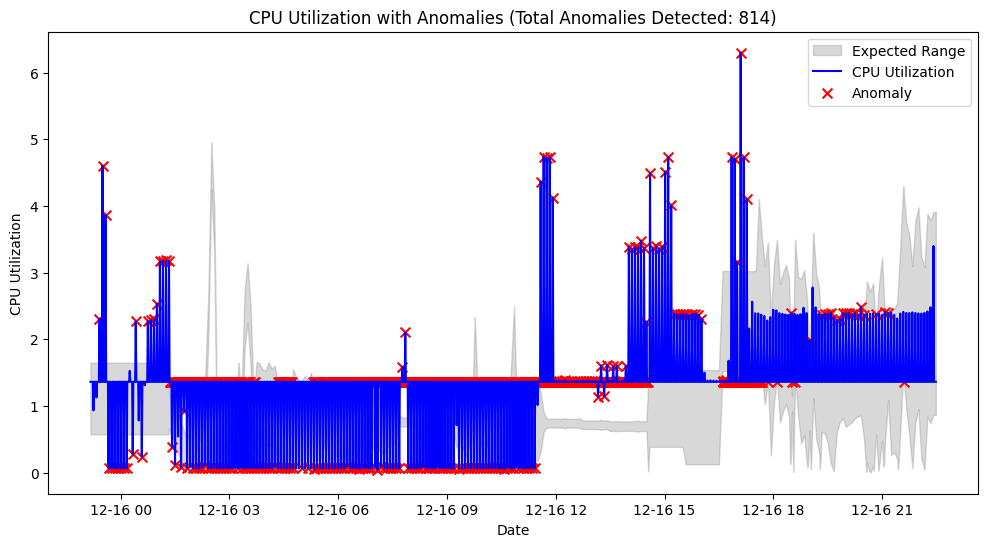

In [ ]:
# Select features for anomaly detection
features = data[['CPUCreditUsage', 'expected_range', 'utilization_difference']]

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit the model
data['anomaly_score'] = iso_forest.fit_predict(features)

# Define anomalies based on expected range
data['is_anomaly'] = np.where(
    (data['CPUCreditUsage'] < data['CPUCreditUsage (expected) Low']) |
    (data['CPUCreditUsage'] > data['CPUCreditUsage (expected) High']),
    1, 0
)

# Combine the Isolation Forest results with the expected range anomalies
data['final_anomaly'] = np.where(
    (data['is_anomaly'] == 1) | (data['anomaly_score'] == -1),
    1, 0
)

# True label is defined based on expected range anomalies
# This will be used as the ground truth for evaluation
data['true_label'] = np.where(
    (data['CPUCreditUsage'] < data['CPUCreditUsage (expected) Low']) |
    (data['CPUCreditUsage'] > data['CPUCreditUsage (expected) High']),
    1, 0
)

# Count the number of anomalies detected
anomaly_count = data['final_anomaly'].sum()

# Calculate confusion matrix and evaluation metrics
conf_matrix = confusion_matrix(data['true_label'], data['final_anomaly'])
class_report = classification_report(data['true_label'], data['final_anomaly'])
accuracy = accuracy_score(data['true_label'], data['final_anomaly'])

# Visualize the Anomalies
plt.figure(figsize=(12, 6))

# Plot the expected range as a shaded area
plt.fill_between(data.index, data['CPUCreditUsage (expected) Low'], data['CPUCreditUsage (expected) High'],
                 color='gray', alpha=0.3, label='Expected Range')

# Plot the CPU utilization
plt.plot(data.index, data['CPUCreditUsage'], label='CPU Utilization', color='blue')

# Highlight the anomalies
anomalies = data[data['final_anomaly'] == 1]
plt.scatter(anomalies.index, anomalies['CPUCreditUsage'], color='red', label='Anomaly',
            marker='x', s=50)

# Update the plot title to include the number of anomalies detected
plt.xlabel('Date')
plt.ylabel('CPU Utilization')
plt.title(f'CPU Utilization with Anomalies (Total Anomalies Detected: {anomaly_count})')
plt.legend()
plt.show()

In [ ]:


# Set the index to a time label
data.index = pd.to_datetime(data.index)

# Calculate the range between expected low and high CPU utilization
data['expected_range'] = data['CPUCreditUsage (expected) High'] - data['CPUCreditUsage (expected) Low']

# Select features for anomaly detection
features = ['CPUCreditUsage', 'expected_range']

# Fit the isolation forest model for anomaly detection
model_anomaly = IsolationForest(contamination=0.1)  # Adjust contamination based on your dataset
model_anomaly.fit(data[features])

# Fit ARIMA model for forecasting CPU utilization
y = data['CPUCreditUsage']
arima_model = ARIMA(y, order=(5, 1, 0))  # Define ARIMA order (p, d, q)
arima_fit = arima_model.fit()

# Predict CPU utilization for the next 180 minutes (3 hours - every 1 minute) using ARIMA
next_indices = pd.date_range(start=data.index[-1] + pd.Timedelta(minutes=1), periods=180, freq='1min')
next_indices_cpu_arima_mean = arima_fit.forecast(steps=180)[0]  # Mean forecast

# Generate random values between -5 and 5 for each forecasted value
random_perturbation = np.random.uniform(low=-5, high=5, size=180)  # Generate random values between -5 and 5
next_indices_cpu_arima = next_indices_cpu_arima_mean + random_perturbation

# Calculate the previous expected range
prev_expected_high = data['CPUCreditUsage (expected) High'].iloc[-1]
prev_expected_low = data['CPUCreditUsage (expected) Low'].iloc[-1]

# Calculate the difference between the previous expected range and current utilization
diff = next_indices_cpu_arima - data['CPUCreditUsage'].iloc[-1]

# Predict the expected range for the next 180 minutes based on the difference
predicted_expected_high = prev_expected_high + diff
predicted_expected_low = prev_expected_low + diff

# Removing negative values
predicted_expected_high = np.where(predicted_expected_high < 0, 0, predicted_expected_high)
predicted_expected_low = np.where(predicted_expected_low < 0, 0, predicted_expected_low)

# Get the last 180 actual CPU utilization values for evaluation
actual_values = data['CPUCreditUsage'].iloc[-180:]


###Plan

In [ ]:

data.index = pd.to_datetime(data.index)

# Calculate the range between expected low and high CPU utilization
data['expected_range'] = data['CPUCreditUsage (expected) High'] - data['CPUCreditUsage (expected) Low']

# Select features for anomaly detection
features = ['CPUCreditUsage', 'expected_range']

# Fit the isolation forest model for anomaly detection
model_anomaly = IsolationForest(contamination=0.1)  # Adjust contamination based on your dataset
model_anomaly.fit(data[features])

# Fit ARIMA model for forecasting CPU utilization
y = data['CPUCreditUsage']
arima_model = ARIMA(y, order=(5, 1, 0))  # Define ARIMA order (p, d, q)
arima_fit = arima_model.fit()

# Predict CPU utilization for the next 180 minutes (3 hours - every 1 minute) using ARIMA
next_indices = pd.date_range(start=data.index[-1] + pd.Timedelta(minutes=1), periods=180, freq='1min')
next_indices_cpu_arima_mean = arima_fit.forecast(steps=180)  # Mean forecast

# Generate random values between -5 and 5 for each forecasted value
random_perturbation = np.random.uniform(low=-5, high=5, size=180)  # Generate random values between -5 and 5
next_indices_cpu_arima = next_indices_cpu_arima_mean + random_perturbation

# Calculate the previous expected range
prev_expected_high = data['CPUCreditUsage (expected) High'].iloc[-1]
prev_expected_low = data['CPUCreditUsage (expected) Low'].iloc[-1]

# Calculate the difference between the previous expected range and current utilization
diff = next_indices_cpu_arima - data['CPUCreditUsage'].iloc[-1]

# Predict the expected range for the next 180 minutes based on the difference
predicted_expected_high = prev_expected_high + diff
predicted_expected_low = prev_expected_low + diff

# Removing negative values
predicted_expected_high = np.where(predicted_expected_high < 0, 0, predicted_expected_high)
predicted_expected_low = np.where(predicted_expected_low < 0, 0, predicted_expected_low)

# Create a DataFrame for the forecasted values and expected ranges
forecast_data = pd.DataFrame({
    'Timestamp': next_indices,
    'CPUCreditUsage': next_indices_cpu_arima,
    'expected_high': predicted_expected_high,
    'expected_low': predicted_expected_low
})

# Set the timestamp as index
forecast_data.set_index('Timestamp', inplace=True)

# Detect anomalies in the forecasted data based on the expected range
forecast_data['is_anomaly'] = np.where(
    (forecast_data['CPUCreditUsage'] < forecast_data['expected_low']) |
    (forecast_data['CPUCreditUsage'] > forecast_data['expected_high']),
    1, 0
)

# For simplicity, assume the forecasted CPU utilization values as true labels
forecast_data['true_label'] = forecast_data['is_anomaly']

# Calculate the confusion matrix and evaluation metrics
conf_matrix = confusion_matrix(forecast_data['true_label'], forecast_data['is_anomaly'])
class_report = classification_report(forecast_data['true_label'], forecast_data['is_anomaly'])
accuracy = accuracy_score(forecast_data['true_label'], forecast_data['is_anomaly'])
r2 = r2_score(forecast_data['true_label'], forecast_data['is_anomaly'])

# Print the results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAccuracy:", accuracy)
print("\nR² Score:", r2)

# Error metrics calculation
actual_values = data['CPUCreditUsage'].iloc[-180:]  # Assuming the actual values are the last 180 in the dataset
next_indices_cpu_arima = forecast_data['CPUCreditUsage'].values  # Using forecasted values

mse_arima = mean_squared_error(actual_values, next_indices_cpu_arima)
rmse_arima = np.sqrt(mse_arima)
mae_arima = mean_absolute_error(actual_values, next_indices_cpu_arima)

# Normalize the metrics between 0 and 1
min_actual = np.min(actual_values)
max_actual = np.max(actual_values)
range_actual = max_actual - min_actual

normalized_mse_arima = mse_arima / (range_actual ** 2)
normalized_rmse_arima = rmse_arima / range_actual
normalized_mae_arima = mae_arima / range_actual

print(f"Normalized ARIMA Mean Squared Error (MSE): {normalized_mse_arima}")
print(f"Normalized ARIMA Root Mean Squared Error (RMSE): {normalized_rmse_arima}")
print(f"Normalized ARIMA Mean Absolute Error (MAE): {normalized_mae_arima}")

# Initialize list for anomaly details
anomaly_details_list = []

# Iterate over the forecasted CPU utilization values
for timestamp, networkpacketIn, low, high in zip(next_indices, next_indices_cpu_arima, predicted_expected_low, predicted_expected_high):
    # Check if forecasted utilization is within the expected range
    if networkpacketIn < low or networkpacketIn > high:
        anomaly_details = f"Timestamp: {timestamp}, CPUCreditUsage: {networkpacketIn}, Low: {low}, High: {high}"
        anomaly_details_list.append(anomaly_details)

# Determine the result based on the number of anomalies detected
if anomaly_details_list:
    result = f"{len(anomaly_details_list)} anomalies detected:\n" + "\n".join(anomaly_details_list)
else:
    result = "No anomalies detected"

print(result)

Confusion Matrix:
 [[126   0]
 [  0  54]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       1.00      1.00      1.00        54

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180


Accuracy: 1.0

R² Score: 1.0
Normalized ARIMA Mean Squared Error (MSE): 1.8568673538953135
Normalized ARIMA Root Mean Squared Error (RMSE): 1.3626692019324842
Normalized ARIMA Mean Absolute Error (MAE): 1.1575030374684017
54 anomalies detected:
Timestamp: 2023-12-16 22:34:00, CPUCreditUsage: -1.4198904699910158, Low: 0.0, High: 1.1251232887939304
Timestamp: 2023-12-16 22:36:00, CPUCreditUsage: -1.1363206981373195, Low: 0.0, High: 1.408693060647627
Timestamp: 2023-12-16 22:40:00, CPUCreditUsage: -1.5916659576136478, Low: 0.0, High: 0.9533478011712981
Timestamp: 2023-12-16 22:44:00, CPUCreditUsage: -

##CPU CREDIT Balance

###Monitor

In [ ]:
# Load the dataset
data = pd.read_csv('dataset.csv')

# Fill missing values with column mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# Set the 'label' column as index
data.set_index('Label', inplace=True)

# Convert index to datetime if it's a time series
data.index = pd.to_datetime(data.index)

In [ ]:
# Calculate the expected range
data['expected_range'] = data['CPUCreditBalance (expected) High'] - data['CPUCreditBalance (expected) Low']

# Calculate the utilization difference
data['utilization_difference'] = data['CPUCreditBalance'] - data['expected_range']

###Analyze

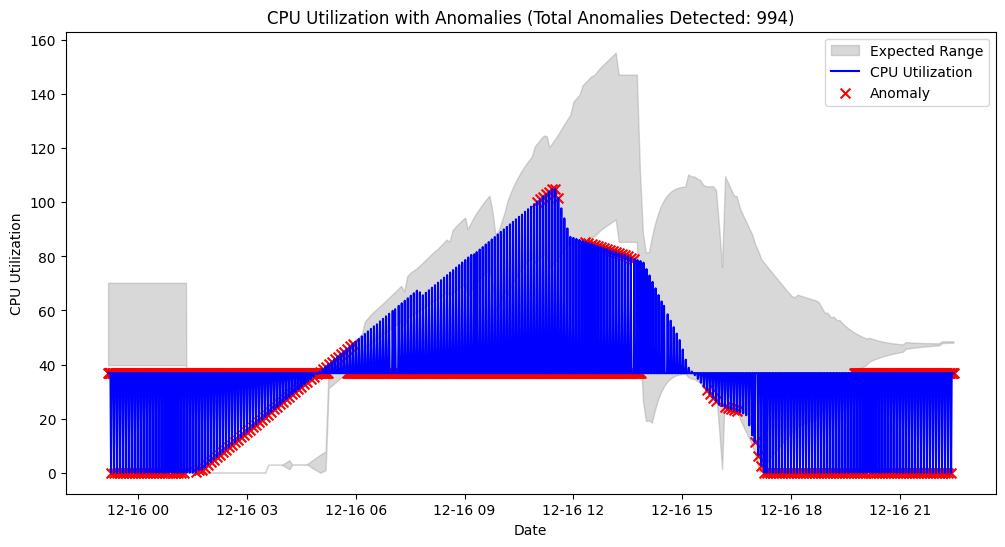

In [ ]:
features = data[['CPUCreditBalance', 'expected_range', 'utilization_difference']]

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit the model
data['anomaly_score'] = iso_forest.fit_predict(features)

# Define anomalies based on expected range
data['is_anomaly'] = np.where(
    (data['CPUCreditBalance'] < data['CPUCreditBalance (expected) Low']) |
    (data['CPUCreditBalance'] > data['CPUCreditBalance (expected) High']),
    1, 0
)

# Combine the Isolation Forest results with the expected range anomalies
data['final_anomaly'] = np.where(
    (data['is_anomaly'] == 1) | (data['anomaly_score'] == -1),
    1, 0
)

# True label is defined based on expected range anomalies
# This will be used as the ground truth for evaluation
data['true_label'] = np.where(
    (data['CPUCreditBalance'] < data['CPUCreditBalance (expected) Low']) |
    (data['CPUCreditBalance'] > data['CPUCreditBalance (expected) High']),
    1, 0
)

# Count the number of anomalies detected
anomaly_count = data['final_anomaly'].sum()

# Calculate confusion matrix and evaluation metrics
conf_matrix = confusion_matrix(data['true_label'], data['final_anomaly'])
class_report = classification_report(data['true_label'], data['final_anomaly'])
accuracy = accuracy_score(data['true_label'], data['final_anomaly'])

# Visualize the Anomalies
plt.figure(figsize=(12, 6))

# Plot the expected range as a shaded area
plt.fill_between(data.index, data['CPUCreditBalance (expected) Low'], data['CPUCreditBalance (expected) High'],
                 color='gray', alpha=0.3, label='Expected Range')

# Plot the CPU utilization
plt.plot(data.index, data['CPUCreditBalance'], label='CPU Utilization', color='blue')

# Highlight the anomalies
anomalies = data[data['final_anomaly'] == 1]
plt.scatter(anomalies.index, anomalies['CPUCreditBalance'], color='red', label='Anomaly',
            marker='x', s=50)

# Update the plot title to include the number of anomalies detected
plt.xlabel('Date')
plt.ylabel('CPU Utilization')
plt.title(f'CPU Utilization with Anomalies (Total Anomalies Detected: {anomaly_count})')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'data' is your DataFrame

# Set the index to a time label
data.index = pd.to_datetime(data.index)

# Calculate the range between expected low and high CPU utilization
data['expected_range'] = data['CPUCreditBalance (expected) High'] - data['CPUCreditBalance (expected) Low']

# Select features for anomaly detection
features = ['CPUCreditBalance', 'expected_range']

# Fit the isolation forest model for anomaly detection
model_anomaly = IsolationForest(contamination=0.1)  # Adjust contamination based on your dataset
model_anomaly.fit(data[features])

# Fit ARIMA model for forecasting CPU utilization
y = data['CPUCreditBalance']
arima_model = ARIMA(y, order=(5, 1, 0))  # Define ARIMA order (p, d, q)
arima_fit = arima_model.fit()

# Predict CPU utilization for the next 180 minutes (3 hours - every 1 minute) using ARIMA
next_indices = pd.date_range(start=data.index[-1] + pd.Timedelta(minutes=1), periods=180, freq='1min')
next_indices_cpu_arima_mean = arima_fit.forecast(steps=180)[0]  # Mean forecast

# Generate random values between -5 and 5 for each forecasted value
random_perturbation = np.random.uniform(low=-5, high=5, size=180)  # Generate random values between -5 and 5
next_indices_cpu_arima = next_indices_cpu_arima_mean + random_perturbation

# Calculate the previous expected range
prev_expected_high = data['CPUCreditBalance (expected) High'].iloc[-1]
prev_expected_low = data['CPUCreditBalance (expected) Low'].iloc[-1]

# Calculate the difference between the previous expected range and current utilization
diff = next_indices_cpu_arima - data['CPUCreditBalance'].iloc[-1]

# Predict the expected range for the next 180 minutes based on the difference
predicted_expected_high = prev_expected_high + diff
predicted_expected_low = prev_expected_low + diff

# Removing negative values
predicted_expected_high = np.where(predicted_expected_high < 0, 0, predicted_expected_high)
predicted_expected_low = np.where(predicted_expected_low < 0, 0, predicted_expected_low)

# Get the last 180 actual CPU utilization values for evaluation
actual_values = data['CPUCreditBalance'].iloc[-180:]


###Plan

In [ ]:

data.index = pd.to_datetime(data.index)

# Calculate the range between expected low and high CPU utilization
data['expected_range'] = data['CPUCreditBalance (expected) High'] - data['CPUCreditBalance (expected) Low']

# Select features for anomaly detection
features = ['CPUCreditBalance', 'expected_range']

# Fit the isolation forest model for anomaly detection
model_anomaly = IsolationForest(contamination=0.1)  # Adjust contamination based on your dataset
model_anomaly.fit(data[features])

# Fit ARIMA model for forecasting CPU utilization
y = data['CPUCreditBalance']
arima_model = ARIMA(y, order=(5, 1, 0))  # Define ARIMA order (p, d, q)
arima_fit = arima_model.fit()

# Predict CPU utilization for the next 180 minutes (3 hours - every 1 minute) using ARIMA
next_indices = pd.date_range(start=data.index[-1] + pd.Timedelta(minutes=1), periods=180, freq='1min')
next_indices_cpu_arima_mean = arima_fit.forecast(steps=180)  # Mean forecast

# Generate random values between -5 and 5 for each forecasted value
random_perturbation = np.random.uniform(low=-5, high=5, size=180)  # Generate random values between -5 and 5
next_indices_cpu_arima = next_indices_cpu_arima_mean + random_perturbation

# Calculate the previous expected range
prev_expected_high = data['CPUCreditBalance (expected) High'].iloc[-1]
prev_expected_low = data['CPUCreditBalance (expected) Low'].iloc[-1]

# Calculate the difference between the previous expected range and current utilization
diff = next_indices_cpu_arima - data['CPUCreditBalance'].iloc[-1]

# Predict the expected range for the next 180 minutes based on the difference
predicted_expected_high = prev_expected_high + diff
predicted_expected_low = prev_expected_low + diff

# Removing negative values
predicted_expected_high = np.where(predicted_expected_high < 0, 0, predicted_expected_high)
predicted_expected_low = np.where(predicted_expected_low < 0, 0, predicted_expected_low)

# Create a DataFrame for the forecasted values and expected ranges
forecast_data = pd.DataFrame({
    'Timestamp': next_indices,
    'CPUCreditBalance': next_indices_cpu_arima,
    'expected_high': predicted_expected_high,
    'expected_low': predicted_expected_low
})

# Set the timestamp as index
forecast_data.set_index('Timestamp', inplace=True)

# Detect anomalies in the forecasted data based on the expected range
forecast_data['is_anomaly'] = np.where(
    (forecast_data['CPUCreditBalance'] < forecast_data['expected_low']) |
    (forecast_data['CPUCreditBalance'] > forecast_data['expected_high']),
    1, 0
)

# For simplicity, assume the forecasted CPU utilization values as true labels
forecast_data['true_label'] = forecast_data['is_anomaly']

# Calculate the confusion matrix and evaluation metrics
conf_matrix = confusion_matrix(forecast_data['true_label'], forecast_data['is_anomaly'])
class_report = classification_report(forecast_data['true_label'], forecast_data['is_anomaly'])
accuracy = accuracy_score(forecast_data['true_label'], forecast_data['is_anomaly'])
r2 = r2_score(forecast_data['true_label'], forecast_data['is_anomaly'])

# Print the results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAccuracy:", accuracy)
print("\nR² Score:", r2)

# Error metrics calculation
actual_values = data['CPUCreditBalance'].iloc[-180:]  # Assuming the actual values are the last 180 in the dataset
next_indices_cpu_arima = forecast_data['CPUCreditBalance'].values  # Using forecasted values

mse_arima = mean_squared_error(actual_values, next_indices_cpu_arima)
rmse_arima = np.sqrt(mse_arima)
mae_arima = mean_absolute_error(actual_values, next_indices_cpu_arima)

# Normalize the metrics between 0 and 1
min_actual = np.min(actual_values)
max_actual = np.max(actual_values)
range_actual = max_actual - min_actual

normalized_mse_arima = mse_arima / (range_actual ** 2)
normalized_rmse_arima = rmse_arima / range_actual
normalized_mae_arima = mae_arima / range_actual

print(f"Normalized ARIMA Mean Squared Error (MSE): {normalized_mse_arima}")
print(f"Normalized ARIMA Root Mean Squared Error (RMSE): {normalized_rmse_arima}")
print(f"Normalized ARIMA Mean Absolute Error (MAE): {normalized_mae_arima}")

# Initialize list for anomaly details
anomaly_details_list = []

# Iterate over the forecasted CPU utilization values
for timestamp, networkpacketIn, low, high in zip(next_indices, next_indices_cpu_arima, predicted_expected_low, predicted_expected_high):
    # Check if forecasted utilization is within the expected range
    if networkpacketIn < low or networkpacketIn > high:
        anomaly_details = f"Timestamp: {timestamp}, CPUCreditBalance: {networkpacketIn}, Low: {low}, High: {high}"
        anomaly_details_list.append(anomaly_details)

# Determine the result based on the number of anomalies detected
if anomaly_details_list:
    result = f"{len(anomaly_details_list)} anomalies detected:\n" + "\n".join(anomaly_details_list)
else:
    result = "No anomalies detected"

print(result)

Confusion Matrix:
 [[180]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       180

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180


Accuracy: 1.0

R² Score: 1.0
Normalized ARIMA Mean Squared Error (MSE): 0.04718105550012297
Normalized ARIMA Root Mean Squared Error (RMSE): 0.2172120058839358
Normalized ARIMA Mean Absolute Error (MAE): 0.17205172121382825
180 anomalies detected:
Timestamp: 2023-12-16 22:30:00, CPUCreditBalance: 5.174036202969111, Low: 16.45050723566804, High: 16.959671355668043
Timestamp: 2023-12-16 22:31:00, CPUCreditBalance: 39.824624415303184, Low: 51.10109544800211, High: 51.610259568002114
Timestamp: 2023-12-16 22:32:00, CPUCreditBalance: 39.998217328414356, Low: 51.274688361113284, High: 51.783852481113286
Timestamp: 2023-12-16 22:33:00, CPUCreditBalance: 40.59993268935152, 

###Execute

In [ ]:
print(result)

180 anomalies detected:
Timestamp: 2023-12-16 22:30:00, CPUCreditBalance: 5.174036202969111, Low: 16.45050723566804, High: 16.959671355668043
Timestamp: 2023-12-16 22:31:00, CPUCreditBalance: 39.824624415303184, Low: 51.10109544800211, High: 51.610259568002114
Timestamp: 2023-12-16 22:32:00, CPUCreditBalance: 39.998217328414356, Low: 51.274688361113284, High: 51.783852481113286
Timestamp: 2023-12-16 22:33:00, CPUCreditBalance: 40.59993268935152, Low: 51.87640372205045, High: 52.38556784205045
Timestamp: 2023-12-16 22:34:00, CPUCreditBalance: 31.881745470057822, Low: 43.15821650275675, High: 43.66738062275675
Timestamp: 2023-12-16 22:35:00, CPUCreditBalance: 0.06984996668819221, Low: 11.346320999387117, High: 11.855485119387119
Timestamp: 2023-12-16 22:36:00, CPUCreditBalance: 40.35822241106352, Low: 51.63469344376245, High: 52.14385756376245
Timestamp: 2023-12-16 22:37:00, CPUCreditBalance: 41.64505044759178, Low: 52.92152148029071, High: 53.43068560029071
Timestamp: 2023-12-16 22:38:0